# Принятие решений в бизнесе.

## <a id="content"><a>Содержание:
- ### <a href='#step1'>Часть 1. Приоритизация гипотез.</a>
    - <a href='#step1.1'> 1.1. Сохранение данных</a>
    - <a href='#step1.2'> 1.2. Применение фреймворка ICE для приоритизации гипотез</a>
    - <a href='#step1.3'> 1.3. Применение фреймворка RICE для приоритизации гипотез</a>
- ### <a href='#step2'>Часть 2. Анализ A/B-теста</a>
    - <a href='#step2.1'>2.1. Сохранение данных и приведение к нужным типам данных</a>
    - <a href='#step2.2'>2.2. Подготовка  данных</a>
    - <a href='#step2.3'>2.3. График кумулятивной выручки по группам</a>
    - <a href='#step2.4'>2.4. График относительного изменения кумулятивной выручки группы В к группе А
    - <a href='#step2.5'>2.5. График кумулятивного среднего чека по группам</a>
    - <a href='#step2.6'>2.6. График относительного изменения кумулятивного среднего чека группы B к группе A</a>
    - <a href='#step2.7'>2.7. График кумулятивной конверсии по группам</a>
    - <a href='#step2.8'>2.8. График относительного изменения кумулятивной конверсии группы B к группе A</a>
    - <a href='#step2.9'>2.9. Точечный график количества заказов по пользователям</a>
    - <a href='#step2.10'>2.10. Расчет 95-го и 99-го перцентилей количества заказов на пользователя</a>
    - <a href='#step2.11'>2.11. Точечный график стоимостей заказов</a>
    - <a href='#step2.12'>2.12. Расчет 95-го и 99-го перцентилей стоимости заказов</a>
    - <a href='#step2.13'>2.13. Расчет статистической значимости различий в конверсии между группами по «сырым» данным</a>
    - <a href='#step2.14'>2.14. Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным</a>
    - <a href='#step2.15'>2.15. Расчет статистической значимости различий в конверсии между группами по «очищенным» данным</a>
    - <a href='#step2.16'>2.16. Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным</a>
    - <a href='#step2.17'>2.17. Графики по «очищенным» данным</a>
- ### <a href='#step3'>Общий вывод</a>

In [1]:
# Подключение необходимых библиотек:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy import stats as st

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## <a id="step1"><a>Часть 1. Приоритизация гипотез.

### <a id="step1.1"><a>1.1. Сохранение данных

In [2]:
# Сохранение файлов:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
# Вывод всей таблицы "hypothesis"
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 150 
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
# Названия столбцов к нижнему регистру:
hypothesis.columns = hypothesis.columns.str.lower()

#### Вывод:
- Для удобства дальнейшей работы все названия столбцов приведены к нижнему регистру.

### <a id="step1.2"><a>1.2. Применение фреймворка ICE для приоритизации гипотез

In [4]:
# Расчет значения ICE:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']
                     / hypothesis['efforts']).round(2)

hypothesis =hypothesis.sort_values(by='ice', ascending=False)
# Новый столбец с позицией гипотезы при использовании фреймворка "ICE":
hypothesis['ice_position'] = np.arange(len(hypothesis)) + 1

# Вывод отсортированной таблицы:
display(hypothesis.style.background_gradient(cmap=sns.light_palette("blue",
                                                            as_cmap=True),
                                     subset=['ice_position']))

,hypothesis,reach,impact,confidence,efforts,ice,ice_position
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,1
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,2
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,4
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,5
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,6
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,7
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,9


### <a id="step1.3"><a>1.3. Применение фреймворка RICE для приоритизации гипотез

In [5]:
# Расчет значения RICE:
hypothesis['rice'] = ((hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])\
                      / hypothesis['efforts']).round(2)

hypothesis =hypothesis.sort_values(by='rice', ascending=False)
# Новый столбец с позицией гипотезы при использовании фреймворка "RICE":
hypothesis['rice_position'] = np.arange(len(hypothesis)) + 1
# Вывод отсортированной таблицы:
display(hypothesis.style.background_gradient(cmap=sns.light_palette("blue",
                                                            as_cmap=True),
                                     subset=['ice_position', 'rice_position']))

,hypothesis,reach,impact,confidence,efforts,ice,ice_position,rice,rice_position
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,3,112,1
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7,5,56,2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,2,40,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8,4,40,4
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,1,16.2,5
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,8,9,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2,6,4,7
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,7,4,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1,9,3,9


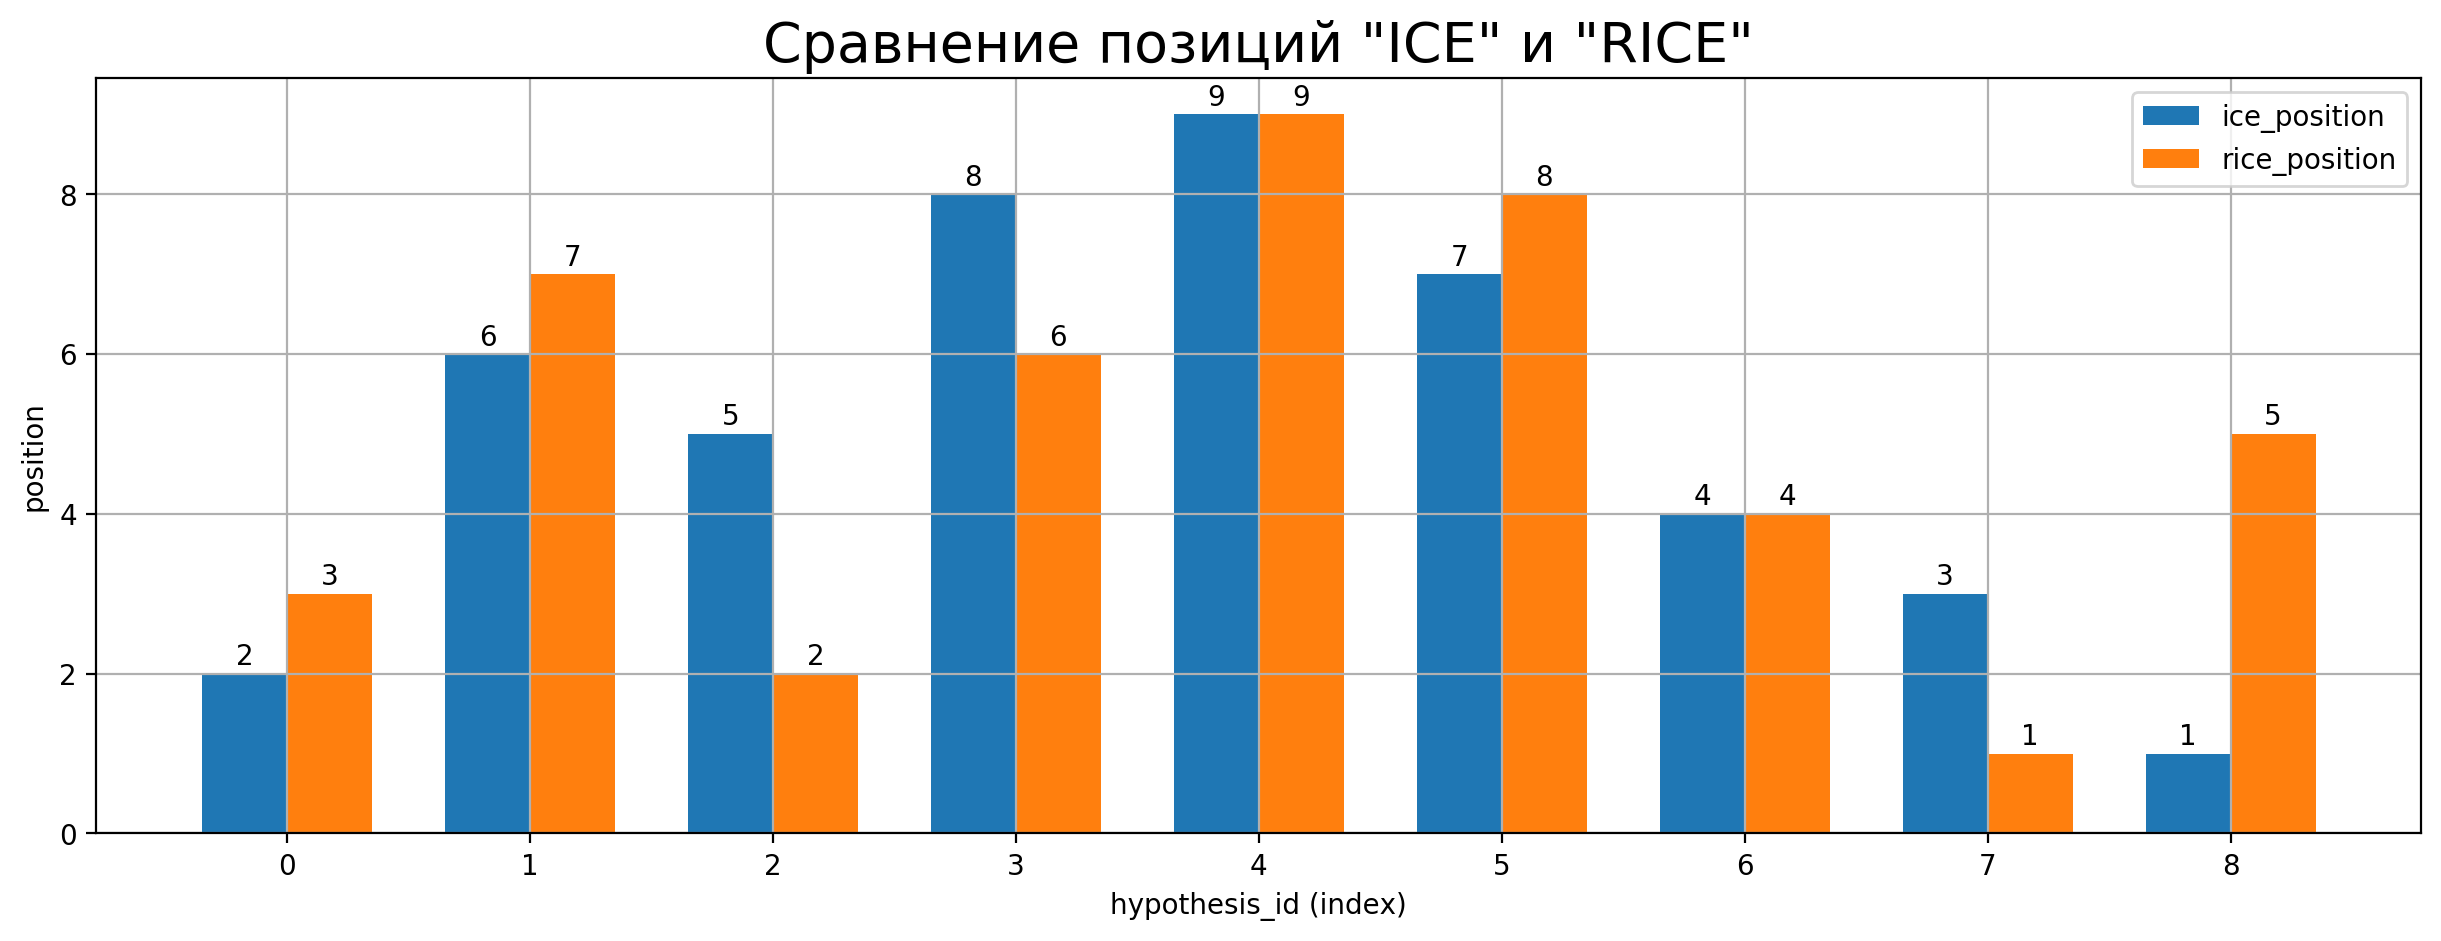

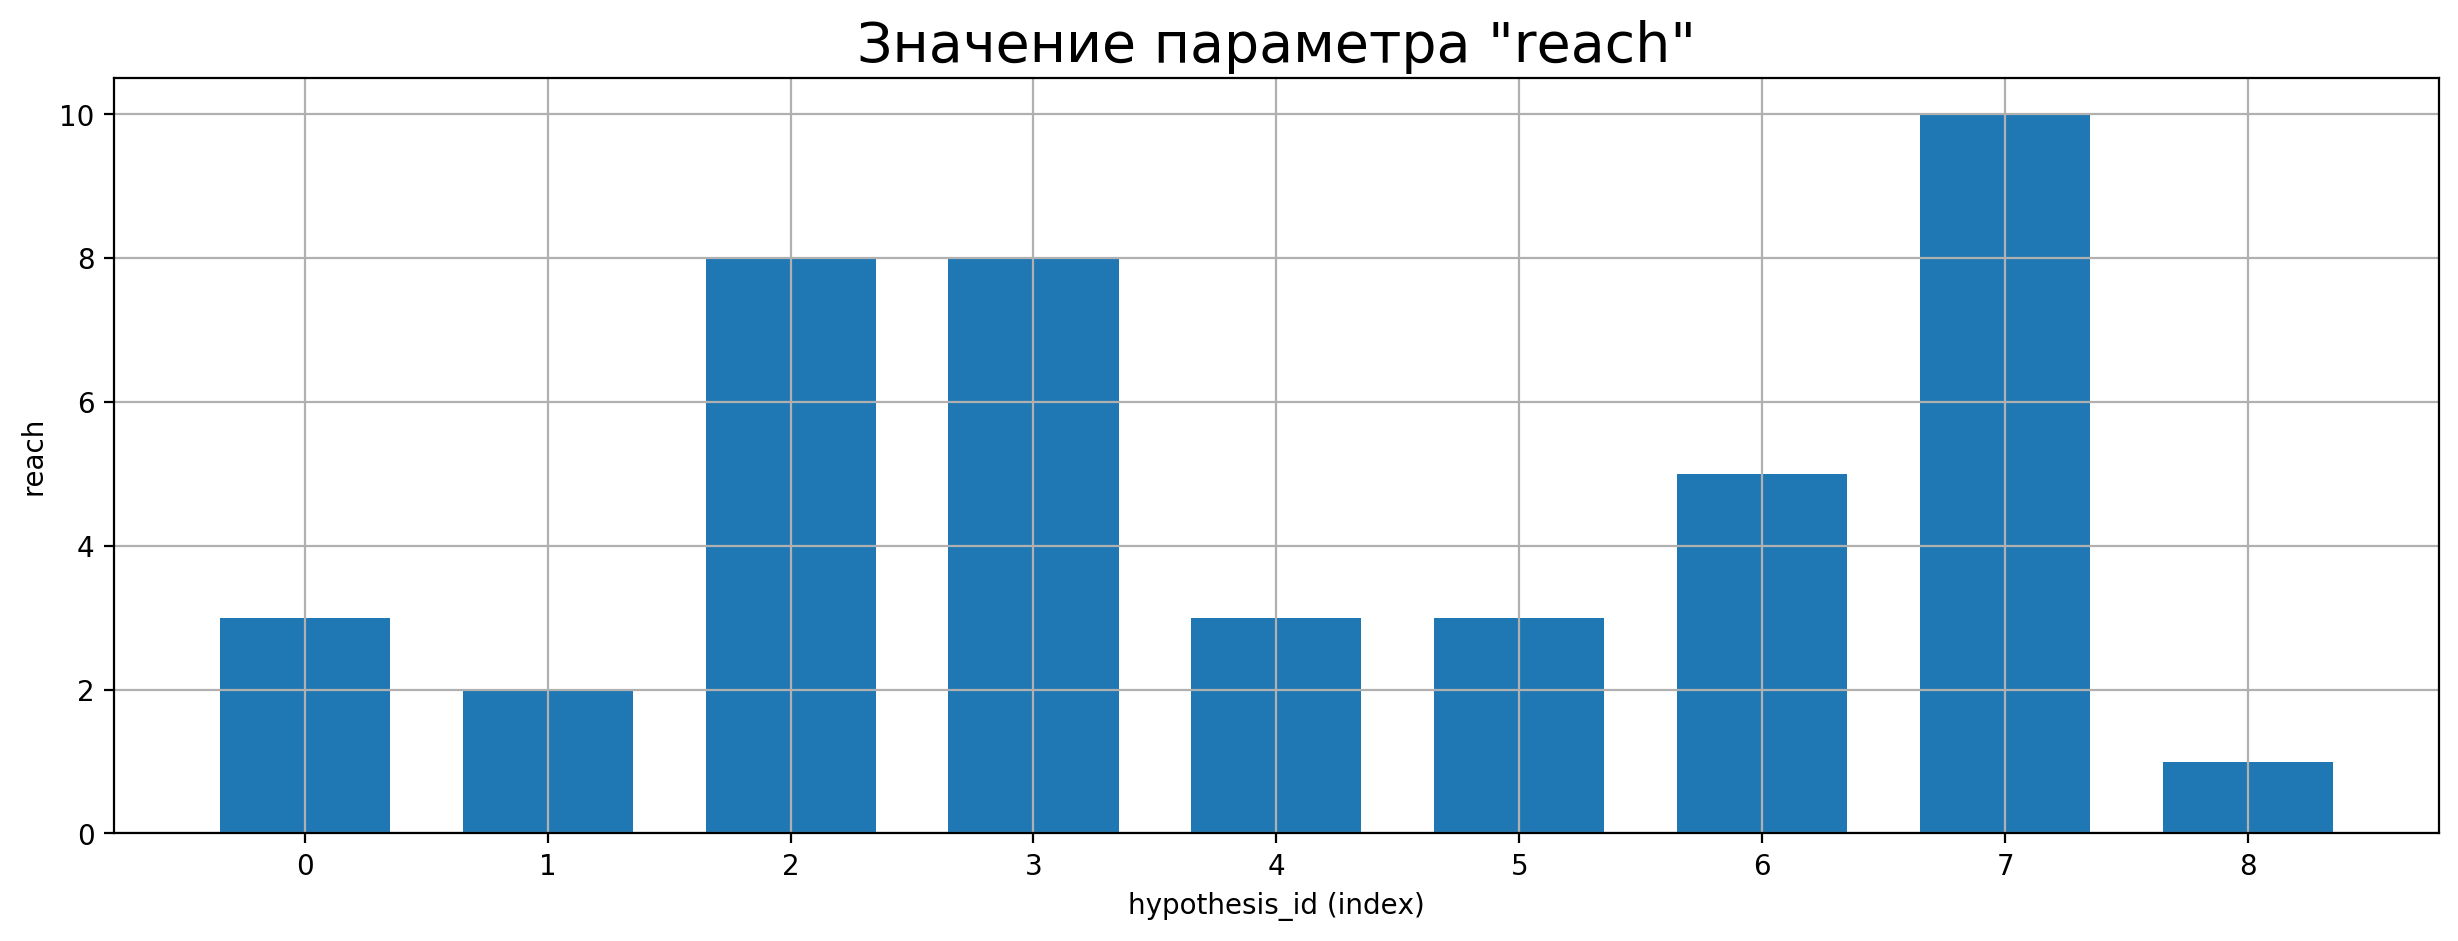

In [6]:
# Построение графика 'Сравнение позиций "ICE" и "RICE"':
# Ширина столбца:
width = 0.35
# Построение графиков в одной системе координат:
fig, ax = plt.subplots(figsize=(15, 5), dpi = 200)
rects1 = ax.bar(hypothesis.index - width/2, hypothesis['ice_position'],
                width, label='ice_position')
rects2 = ax.bar(hypothesis.index + width/2, hypothesis['rice_position'],
                width, label='rice_position')
# Оформление
ax.set_ylabel('position')
ax.set_title('Сравнение позиций "ICE" и "RICE"', fontdict = {'fontsize': 20})
ax.set_xticks(np.arange(len(hypothesis)))
ax.set_xlabel('hypothesis_id (index)')
ax.legend()
plt.grid()

# Функция для подписи значений позиций (высоты столбца):
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 1 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Вызов функции для каждого подграфика:
autolabel(rects1)
autolabel(rects2)

plt.show()
plt.close()

# График значения параметра "reach" для гипотез:
plt.figure(figsize=(15, 5), dpi = 200)
plt.bar(hypothesis.index, hypothesis['reach'], 0.7)
# Оформление
plt.ylabel('reach')
plt.title('Значение параметра "reach"', fontdict = {'fontsize': 20})
plt.xticks(np.arange(len(hypothesis)))
plt.xlabel('hypothesis_id (index)')
plt.grid()

plt.show()
plt.close()

#### Вывод:
- При использовании фреймворков "ICE" и "RICE" при приоритизации позиции некоторых гипотез значительно изменились;
- Это связано с тем, что по сути значение, которое мы получем, применяя фреймворк "RICE" линейно зависит от значения, получаемого при использовании фреймворка "ICE";
- Коэффициэнтом в это зависимости выступает параметр "Reach", а именно: "RICE = ICE * Reach"
- Таким образом, основным различием в данных оценках выступает охват пользователей;
- Его значение смещает позицию, полученную фреймворком "ICE" в большую или меньшую сторону;
- Например, согласно "ICE" гипотеза с индексом 8 ("Запустить акцию, дающую скидку на товар в день рождения")имеет первую позицию, т.е. должна быть проверена первой из всего списка, однако очень маленький охват пользователей ("Reach"=1 - по 10 -бальной шкале) смещает ее позицию на 5 место, если использовать "RICE";
- И наоборот, высокое значение охвата (8 и 10) для гипотез с индексами 2 ("Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа") и 7 ("Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок") смещает их с 5 и 3 (согласно "ICE") на первые две позиции списка приоритизации, если использовать фреймворк "RICE".

**<a href='#content'>К содержанию...</a>**

## <a id="step2"><a>Часть 2. Анализ A/B-теста

### <a id="step2.1"><a>2.1. Сохранение данных и приведение к нужным типам данных

In [7]:
# Сохранение файлов:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
# Вывод первых 5 строк и общей информации таблицы "orders":
display(orders.head())
display(orders.info())
# Вывод первых 5 строк и общей информации таблицы "visitors":
display(visitors.head())
display(visitors.info())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [8]:
# Приведение дат к фотмату "datetime"
orders['date'] = orders['date'].map(lambda x: dt.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.strptime(x, '%Y-%m-%d'))
# Получение временных диапазонов проведения теста для данных из таблиц:
print ('Временной диапазон для таблицы "orders":',
       orders['date'].min(), orders['date'].max())
print ('Временной диапазон для таблицы "visitors":',
       visitors['date'].min(), visitors['date'].max())

Временной диапазон для таблицы "orders": 2019-08-01 00:00:00 2019-08-31 00:00:00
Временной диапазон для таблицы "visitors": 2019-08-01 00:00:00 2019-08-31 00:00:00


In [9]:
print('Количество полных дубликатов в таблице "orders":', orders.duplicated().sum())
print('Количество полных дубликатов в таблице "visitors":', visitors.duplicated().sum())

Количество полных дубликатов в таблице "orders": 0
Количество полных дубликатов в таблице "visitors": 0


In [10]:
# Уникальные "Id" пользователей группы А с количеством совершенных заказов:
ordersByUsersA = (orders[orders['group']=='A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique})
                 )
ordersByUsersA.columns = ['visitorId', 'orders']

# Уникальные "Id" пользователей группы В с количеством совершенных заказов:
ordersByUsersB = (orders[orders['group']=='B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique})
                 )
ordersByUsersB.columns = ['visitorId', 'orders']

usersInBothGroups = ordersByUsersA[ordersByUsersA['visitorId']
                                   .isin(ordersByUsersB['visitorId'])]['visitorId']
print ('Количество пользователей, попавших в обе группы: ', usersInBothGroups.shape[0])

Количество пользователей, попавших в обе группы:  58


In [11]:
orders = orders[~orders['visitorId'].isin(usersInBothGroups)]
display(orders.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null datetime64[ns]
revenue          1016 non-null int64
group            1016 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


None

#### Вывод:
- В обеих таблицах пропуски не обнаружены;
- Данные с столбцах с датами приведены к нужному типу - *datetime*;
- Полных дубликатов не обнаружено;
- Обнаружено 58 пользователей, которые попали в обе группы, что является нарушением - в этом случае результаты теста некорректны;
- Данные пользователи удалены из таблицы "orders";
- Так же проверены времменые диапазоны в обеих таблицах - они совпадают, поэтому никаких дополнительных корректировок на данном этапе не требуется.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.2"><a>2.2. Подготовка  данных

In [12]:
# Функция для создания таблицы для дальнейшего построения графиков:
def data_preparation(visitors, orders):
    # Количество посетителей группы А каждый день:
    visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
    visitorsADaily.columns = ['date', 'visitorsPerDateA']
    # Кумулятивное количество посетителей группы А на указанныу дату:
    visitorsACummulative = visitorsADaily.apply(lambda x: 
                                            visitorsADaily[visitorsADaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}),
                                            axis=1)
    visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

    # Количество посетителей группы B каждый день:
    visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
    visitorsBDaily.columns = ['date', 'visitorsPerDateB']

    # Кумулятивное количество посетителей группы B на указанныу дату:
    visitorsBCummulative = visitorsBDaily.apply(lambda x: 
                                            visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                                            .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}),
                                            axis=1)
    visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

    # Количество заказов посетителей группы А каждый день:
    ordersADaily = orders[orders['group']=='A'][['date','transactionId',
                                                 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
    ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

    # Кумулятивное количество заказов посетителей группы А на указанныу дату:
    ordersACummulative = ordersADaily.apply(
        lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
    ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

    # Количество заказов посетителей группы B каждый день:
    ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId',
                                                 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
    ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

    # Кумулятивное количество заказов посетителей группы B на указанныу дату:
    ordersBCummulative = ordersBDaily.apply(
        lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
    ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

    # Объединение таблиц:
    data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
    
    return data

In [13]:
# Вызов функции "data_preparation()" для создания таблицы по исходным данным:
data = data_preparation(visitors, orders)
# Вывод первых 5 строк результирующей таблицы "data":
display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


#### Вывод:
- Проведена необходимая подготовка для построения графиков - создана итоговая таблица на основе исходных данных.
- Таблица содержит следующие столбцы:
    - "**date**" - дата;
    - "**ordersPerDateA**" и "**ordersPerDateB**" - количество заказов для групп А и В в указанную дату;
    - "**revenuePerDateA**" и "**revenuePerDateВ**" - выручка в указанную дату;
    - "**ordersCummulativeA**" и "**ordersCummulativeB**" - кумулятивное количество заказов на указанную дату;
    - "**revenueCummulativeA**" и "**revenueCummulativeB**" - кумулятивная выручка на указанную дату;
    - "**visitorsPerDateA**" и "**visitorsPerDateB**" - количество посетителей в указанную дату;
    - "**visitorsCummulativeA**" и "**visitorsCummulativeB**" - кумулятивное количество посетителей на указанную дату.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.3"><a>2.3. График кумулятивной выручки по группам

In [14]:
# Функция для построение совместных линейных графиков:
def joint_plot(data, y_A, y_B, title, y_label, arrow):
    plt.figure(figsize=(15, 5), dpi = 200)
    plt.title(title, fontdict = {'fontsize': 20})

    plt.plot(data['date'], y_A, label='A')
    plt.plot(data['date'], y_B, label='B')
    plt.grid()
    plt.legend()
    plt.xlabel('дата')
    plt.ylabel(y_label)
    
    if arrow:
        plt.annotate('скачок', xy=('2019-08-17', y_B.max()*0.75),
                     xytext=('2019-08-10', y_B.max()*0.9),
            arrowprops=dict(facecolor='g'))
    
    plt.show()
    plt.close()

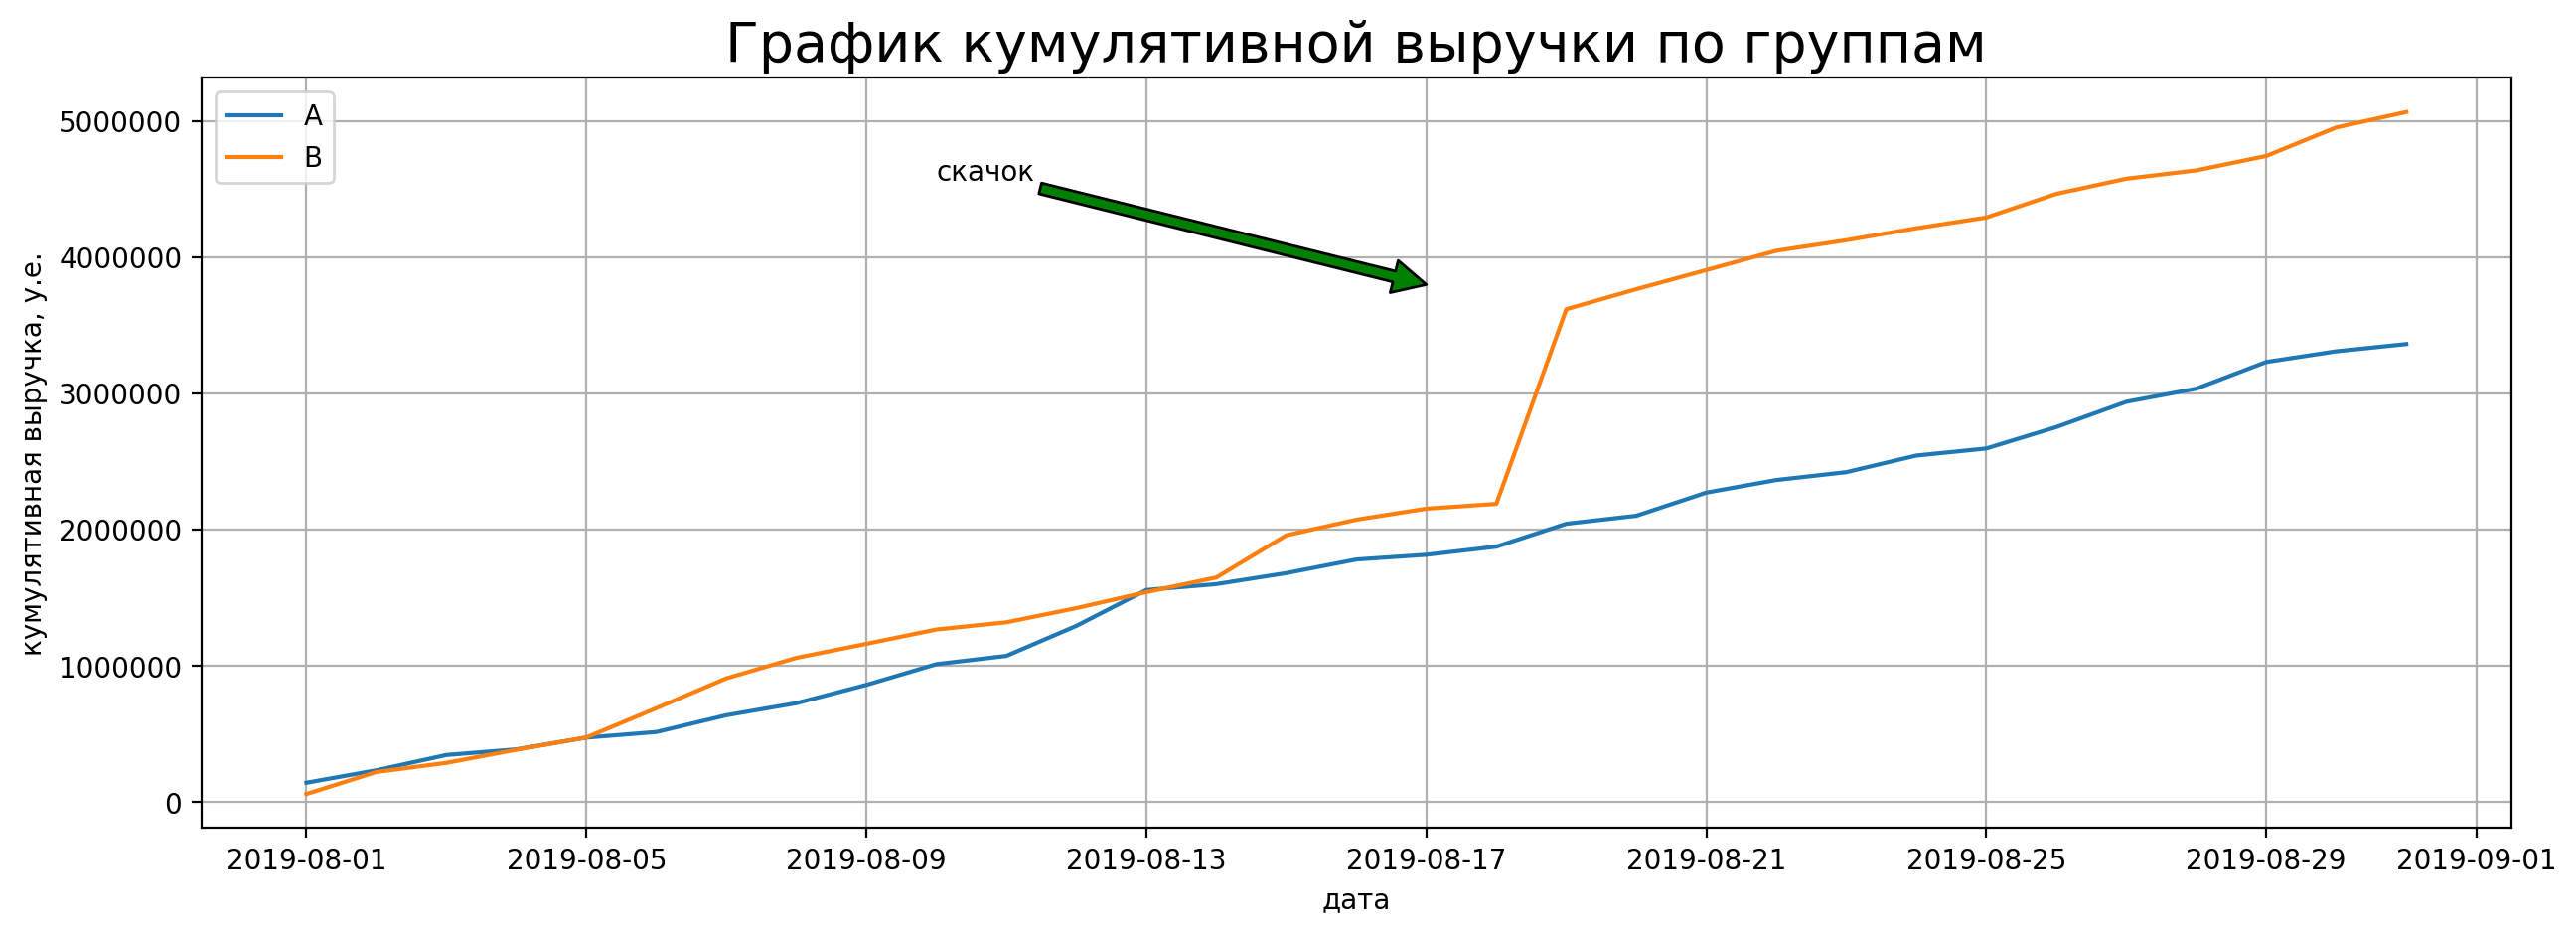

In [15]:
# Вызов функции "joint_plot()" для построения графика кумулятивной выручки по группам
joint_plot(data, 
           data['revenueCummulativeA'], 
           data['revenueCummulativeB'],
           'График кумулятивной выручки по группам', 'кумулятивная выручка, у.е.', True)        

#### Вывод:
- По полученному графику можно сказать, что в целом кумулятивная выручка растет с течением времени достаточно равномерно, за исключением резкого скачка в группе В;
- Причина появления такого резкого увеличения кумулятивной выручки может быть в резком увеличении числа заказов в этот день, либо аномально дорогих заказов.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.4"><a>2.4. График относительного изменения кумулятивной выручки группы В к группе А

In [16]:
# функция для построения линейного графика с дополнительной осью:
def plot (data, y, axy, title, arrow):
    plt.figure(figsize=(15, 5), dpi = 200)
    plt.title(title, fontdict = {'fontsize': 20})

    plt.plot(data['date'], y)
    plt.grid()
    plt.axhline(y=0, color='black', linestyle='--')
    plt.axhline(y=axy, color='grey', linestyle='--')
    plt.xlabel('дата')
    plt.ylabel('значение относителього различия')
    
    if arrow:
        plt.annotate('скачок', xy=('2019-08-17', y.max()*0.75),
                     xytext=('2019-08-10', y.max()*0.9),
            arrowprops=dict(facecolor='g'))

    plt.show()
    plt.close()
    

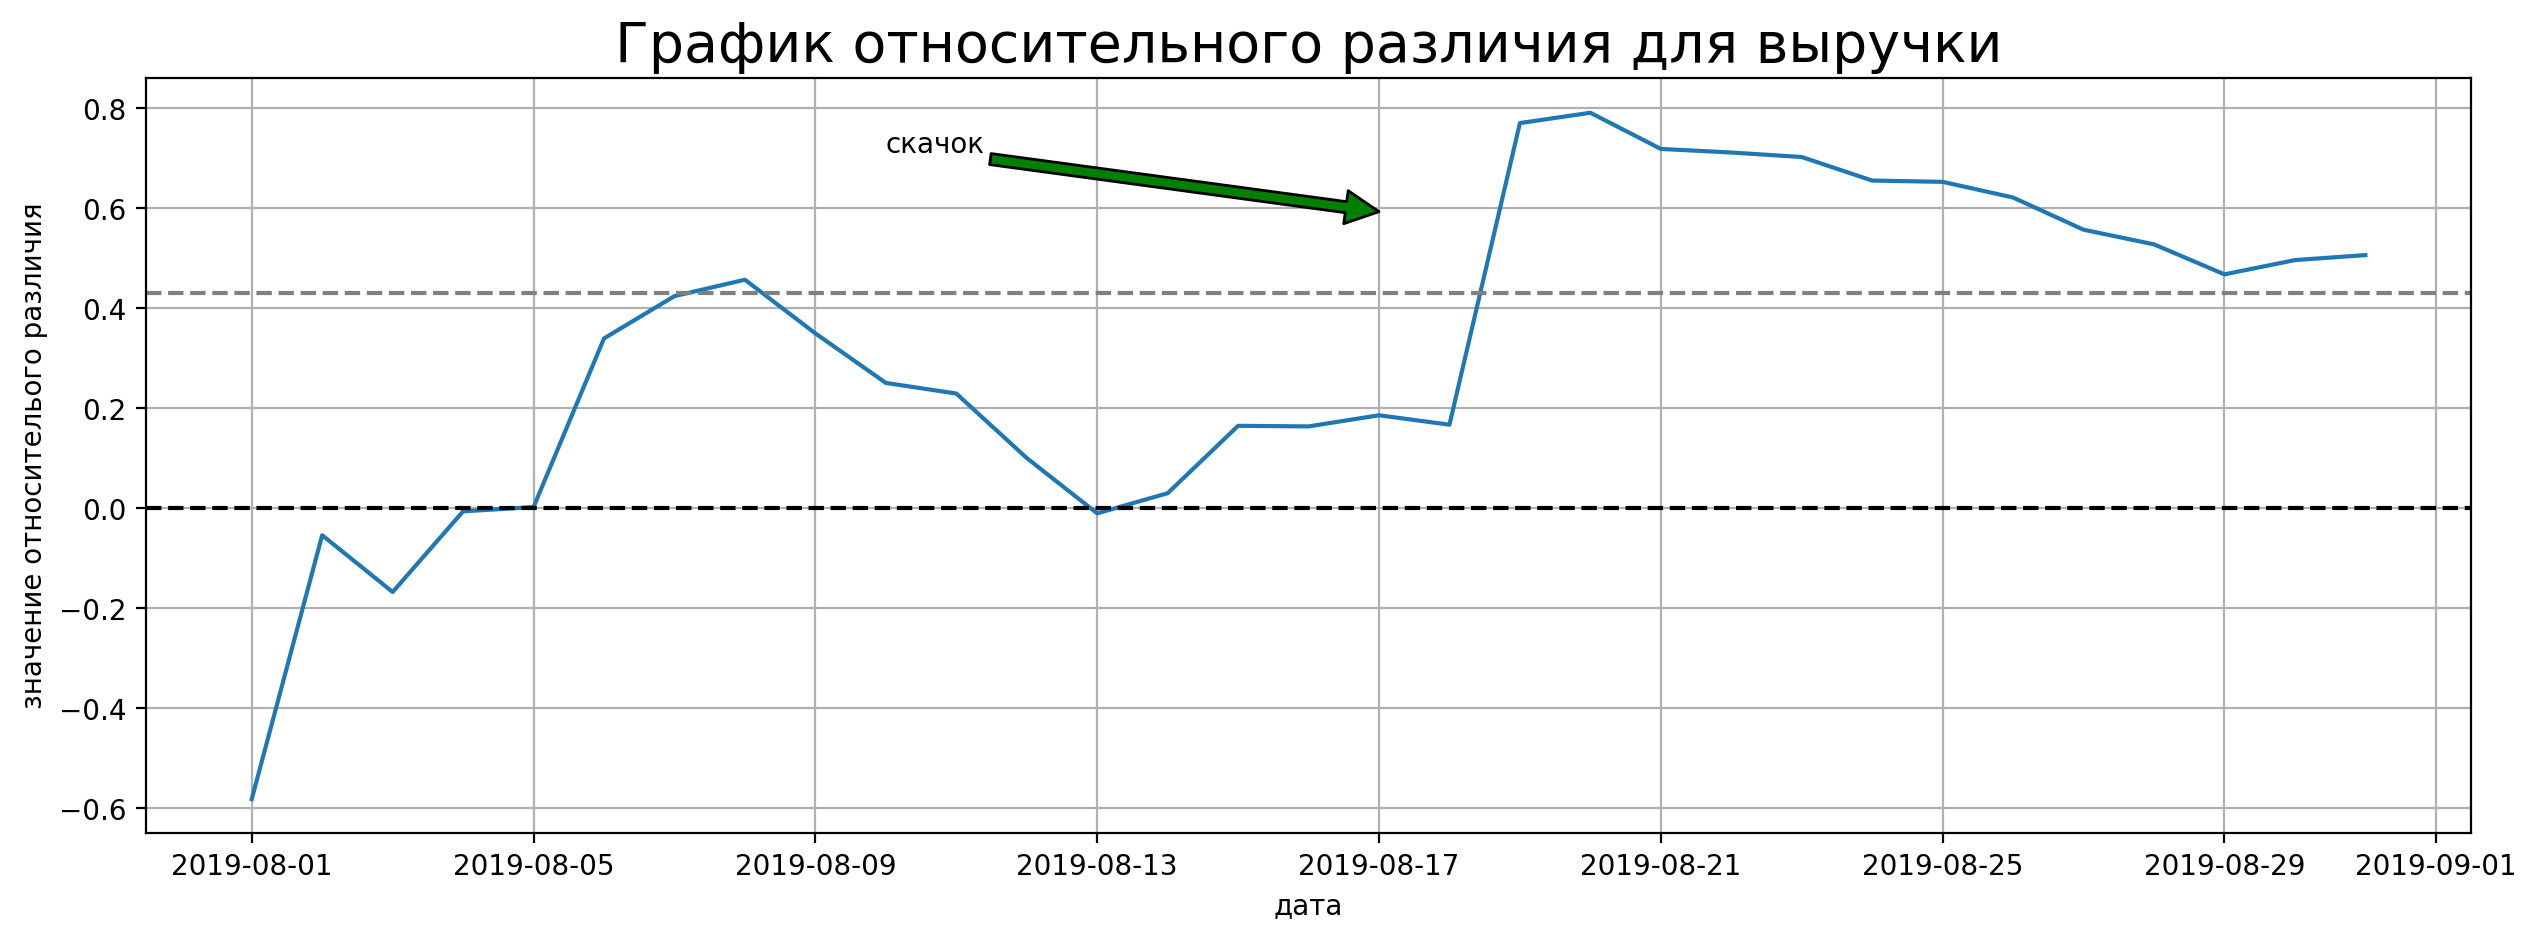

In [17]:
# Вызов функции "plot" для построения графика относительного различия для выручки:
plot(data,
     data['revenueCummulativeB']/data['revenueCummulativeA'] - 1,
     0.43,
     'График относительного различия для выручки', True)

#### Вывод:
- Заметны значительные колебания в начале периода;
- Так же присутствует скачок, обусловленный резким ростом значения в группе В.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.5"><a>2.5. График кумулятивного среднего чека по группам

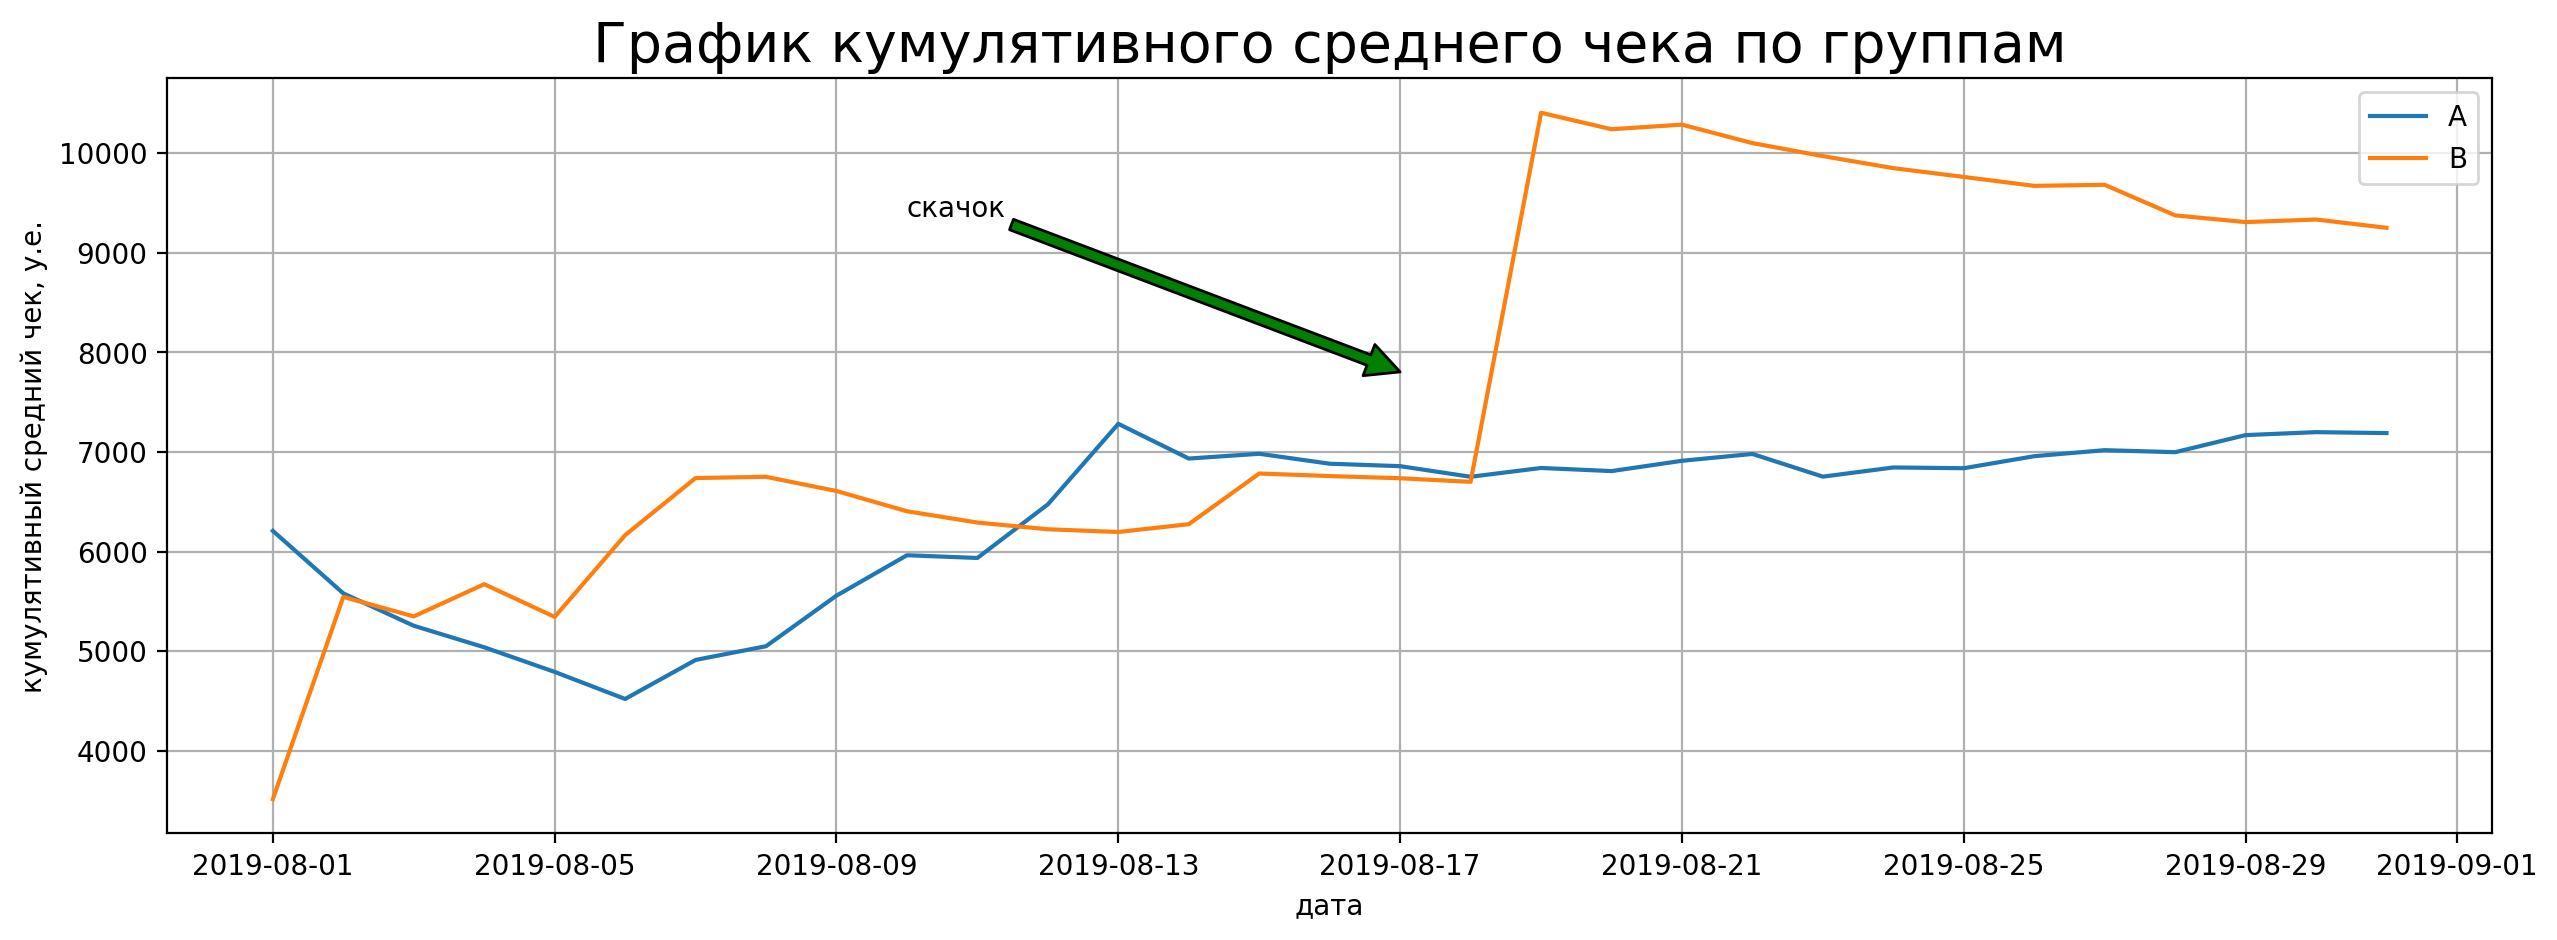

In [18]:
# Вызов функции "joint_plot()" для построения графика кумулятивного среднего чека по группам:
joint_plot(data,
           data['revenueCummulativeA']/data['ordersCummulativeA'],
           data['revenueCummulativeB']/data['ordersCummulativeB'],
           'График кумулятивного среднего чека по группам',
           'кумулятивный средний чек, у.е.', True)

#### Вывод:
- График кумулятивного среднего чека в начале проведения теста колеблется в обеих группах, затем выравнивается и, можно сказать, устанавливается на определенном значении;
- Опять наблюдается резкое увеличение среднего чека в группе В - в выборку явно попал заказ или несколько заказов с аномально высокой стоимостью;
- Средний чек группы А в начале проведения теста падает и значительно проигрывает среднему чеку группы В, затем догоняет и выходит на примерно тот же уровень (до скачка среднего чека группы В), далее остается на этом уровне с небольшим ростом ближе к концу периода;
- Средний чек группы В постоянно растет в первый период времени, однако после резкого скачка имеет тенденцию к падению - если бы не было резкого скачка, значение среднего чека в группе В на дату сбора данных проигрывало бы значению в группе А.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.6"><a>2.6. График относительного изменения кумулятивного среднего чека группы B к группе A

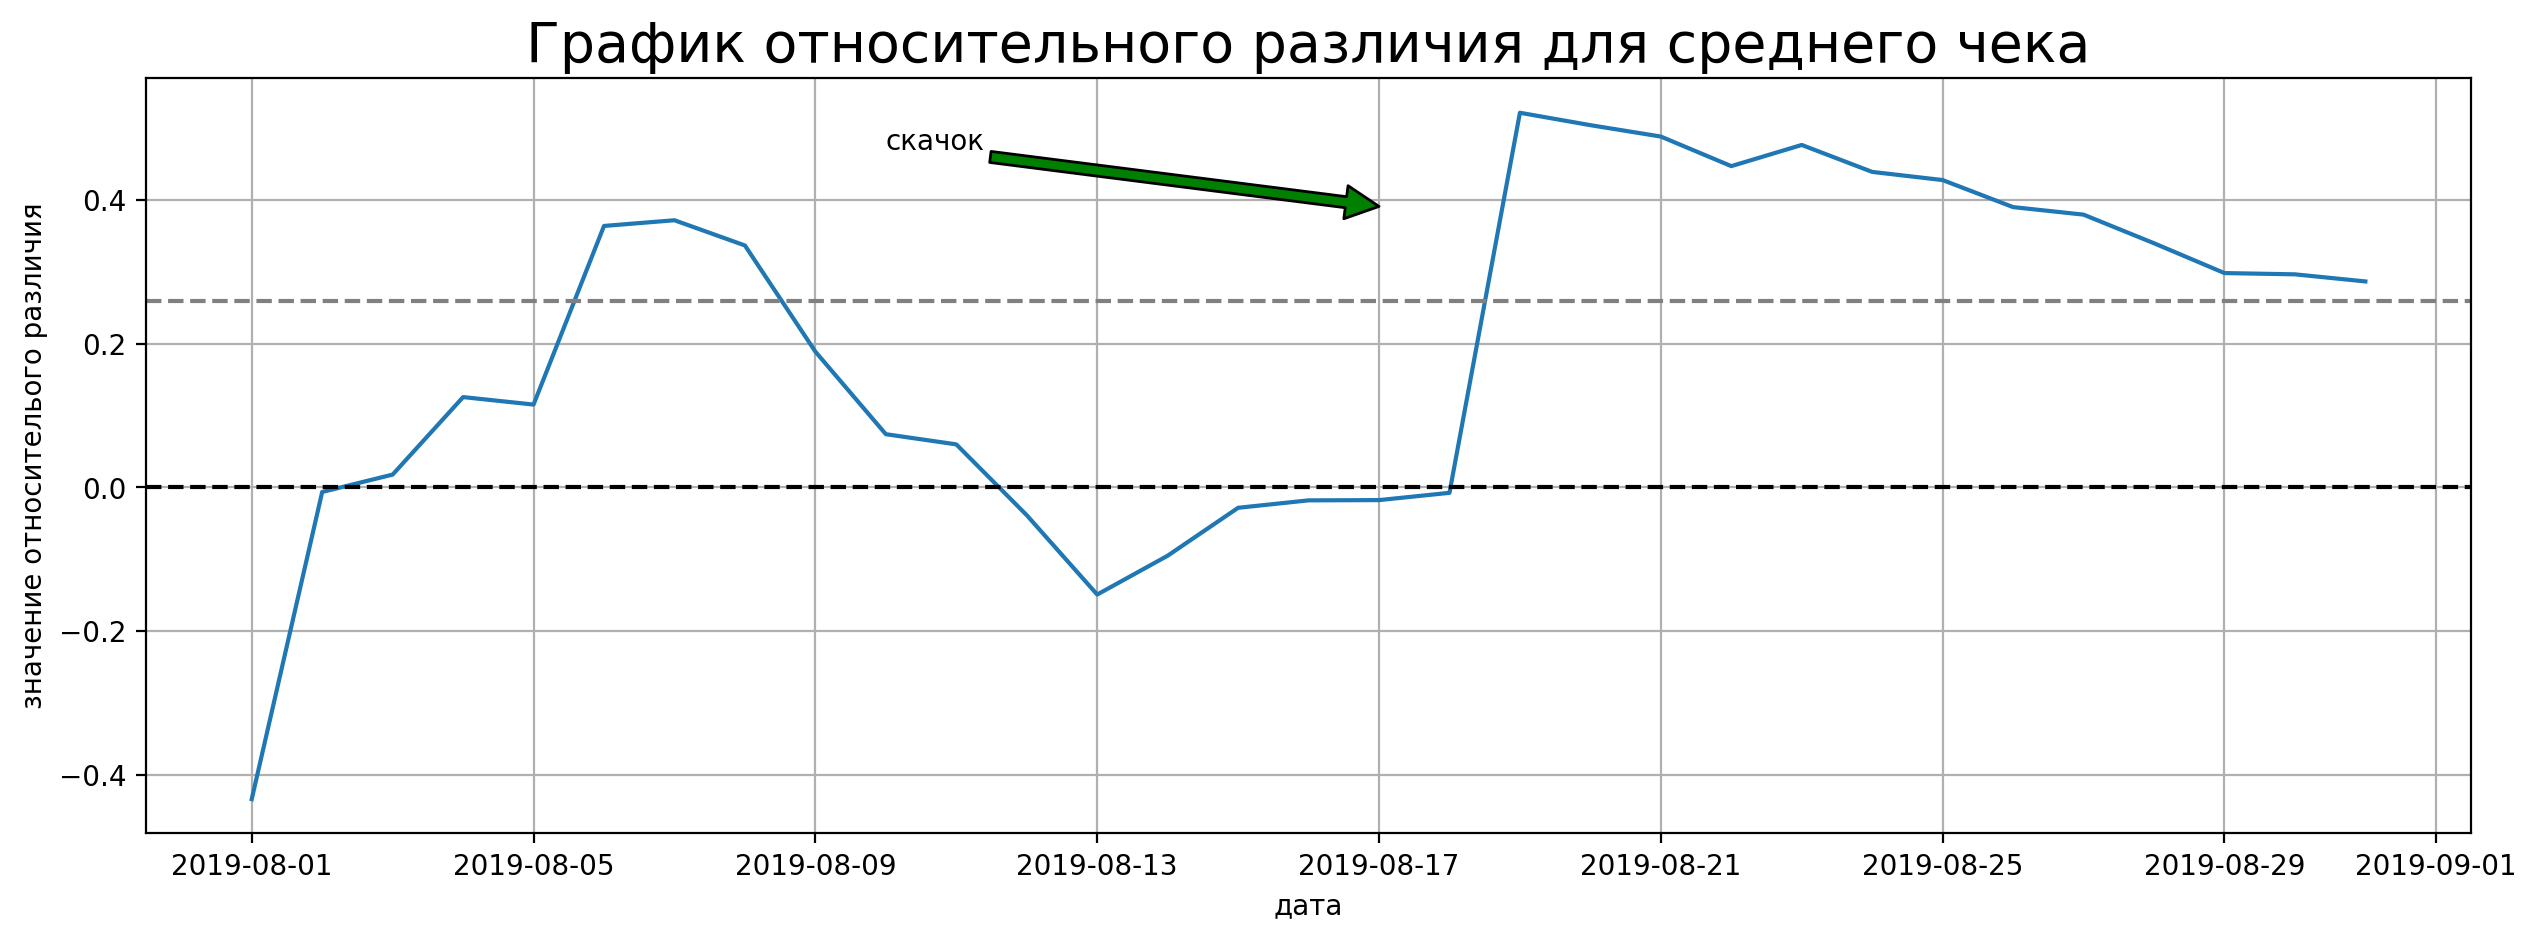

In [19]:
# Вызов функции "plot" для построения графика относительного различия для среднего чека:
plot(data,
     (data['revenueCummulativeB']/data['ordersCummulativeB'])/
     (data['revenueCummulativeA']/data['ordersCummulativeA']) - 1,
     0.26,
     'График относительного различия для среднего чека', True)

#### Вывод:
- По графику относительного различия для среднего чека можно сказать, что средний чек группы В на протяжении практически всего теста значительно превосходит значение среднего чека группы А, однако во второй половине периода это обусловлено резким скачком, о котором мы упомонали ранее;
- После данного скачка относительное различие достаточно стремительно сокращается - это обусловлено небольшим ростом среднего чека группы А и падением среднего чека группы В, которое отмечалось в выводах к пердыдущему графику;
- В целом, можно предположить, что после очистки данных (условия для нее определим далее), аномально дорогие заказы, обуславливающие данный скачок, не попадут в выборку и таким образом относительное различие среднего чека приобретет отрицательное значение, т.е. кумулятивный средний чек группы А будет несколько больше кумулятивного среднего чека группы В;
- Для подтверждения данного предположения можно дополнительно построить графики кумулятивной выручки по группам, кумулятивного среднего чек и относительного различия среднего чека по очищенным данным.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.7"><a>2.7. График кумулятивной конверсии по группам

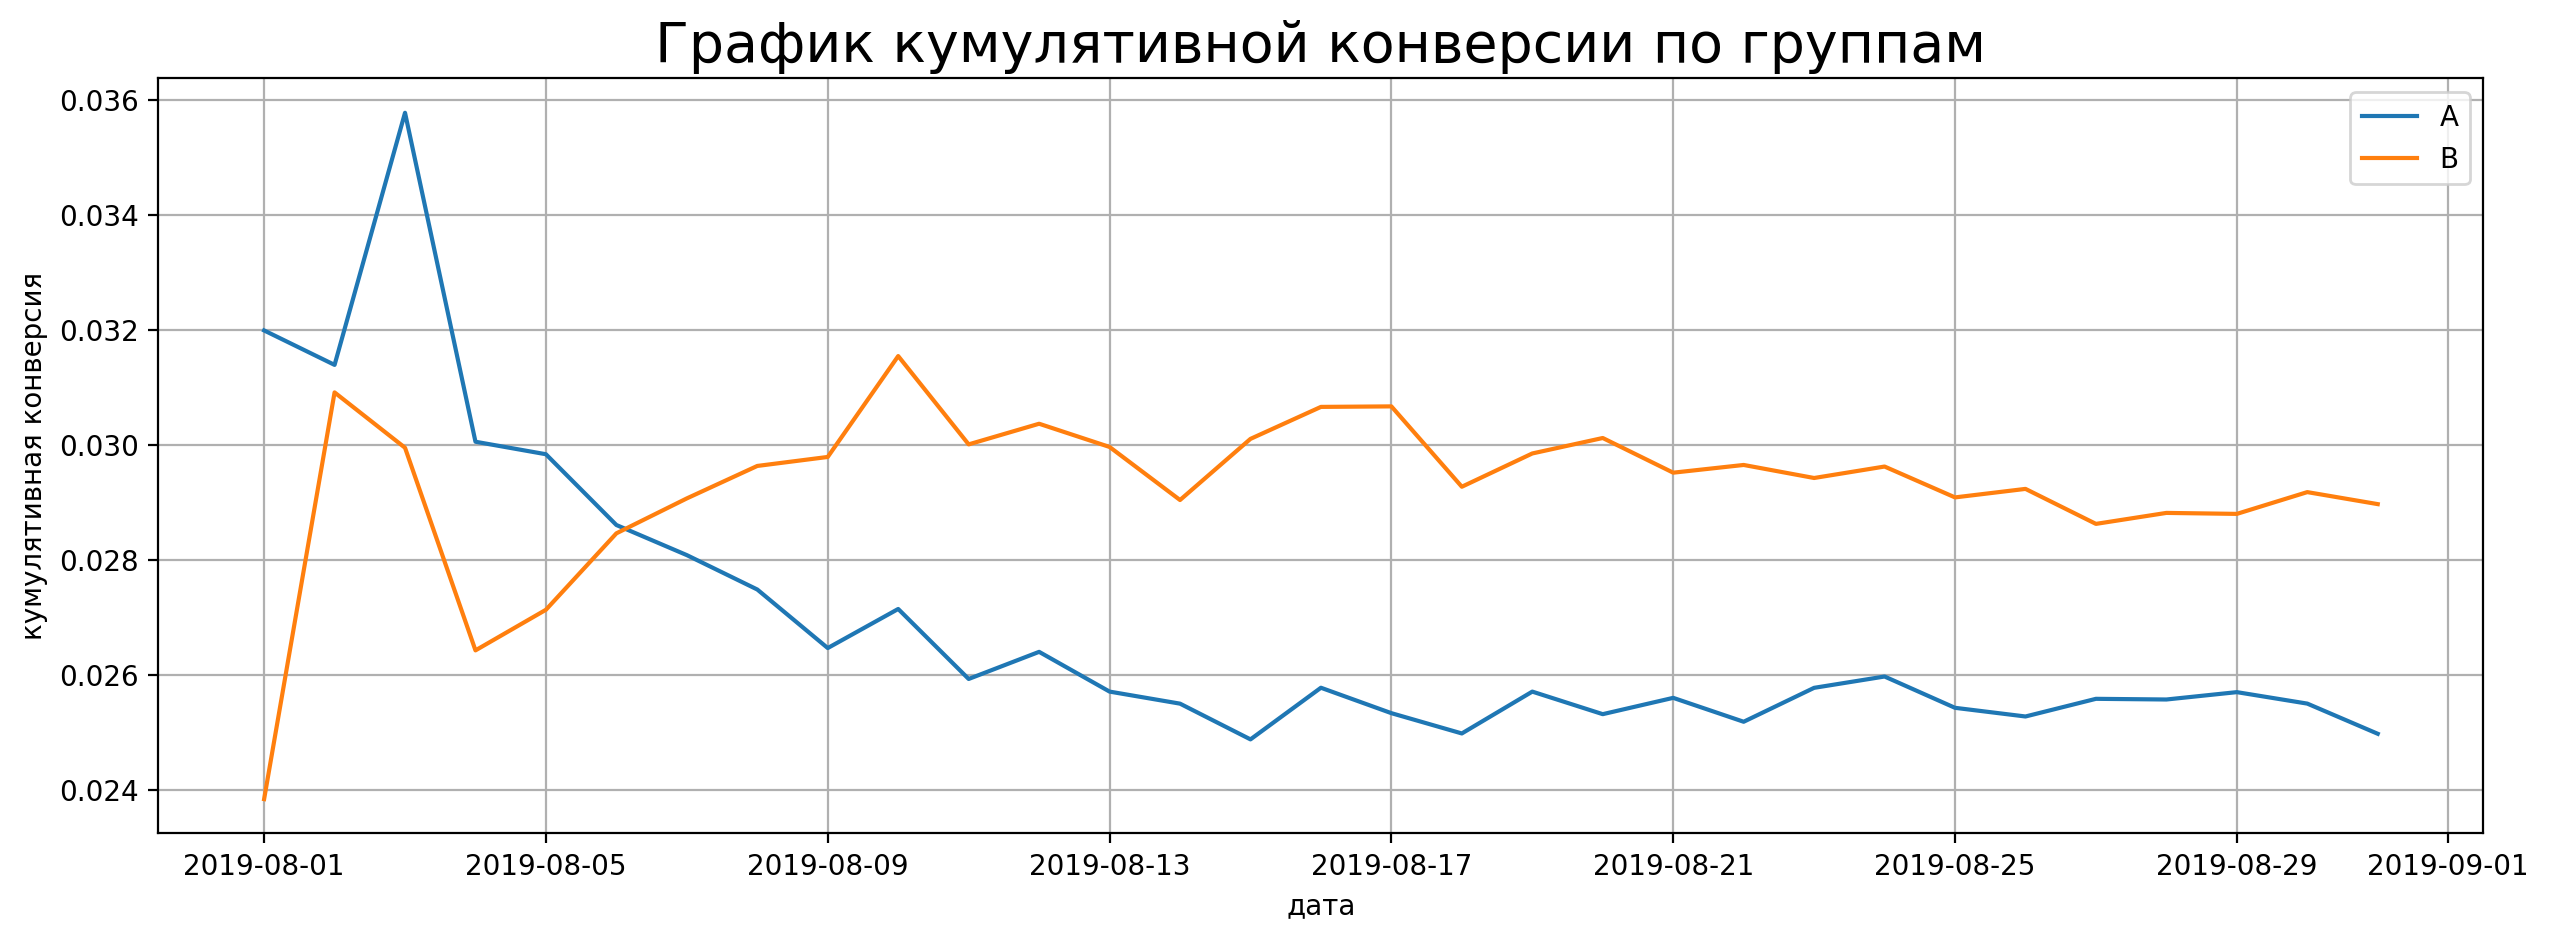

In [20]:
# Вызов функции "joint_plot()" для построения графика кумулятивной конверсии по группам:
joint_plot(data,
           data['ordersCummulativeA']/data['visitorsCummulativeA'],
           data['ordersCummulativeB']/data['visitorsCummulativeB'],
           'График кумулятивной конверсии по группам', 'кумулятивная конверсия', False)

#### Вывод:
- В начале периода проведения теста наблюдаются сильные колебания значения кумулятивной конверсии в обеих группах, далее колебания уменьшаются и значения устанавливаются на определенных уровнях;
- Согласно полеченному графику кумулятивная конверсия группы В значительно больше значения группы А.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.8"><a>2.8. График относительного изменения кумулятивной конверсии группы B к группе A

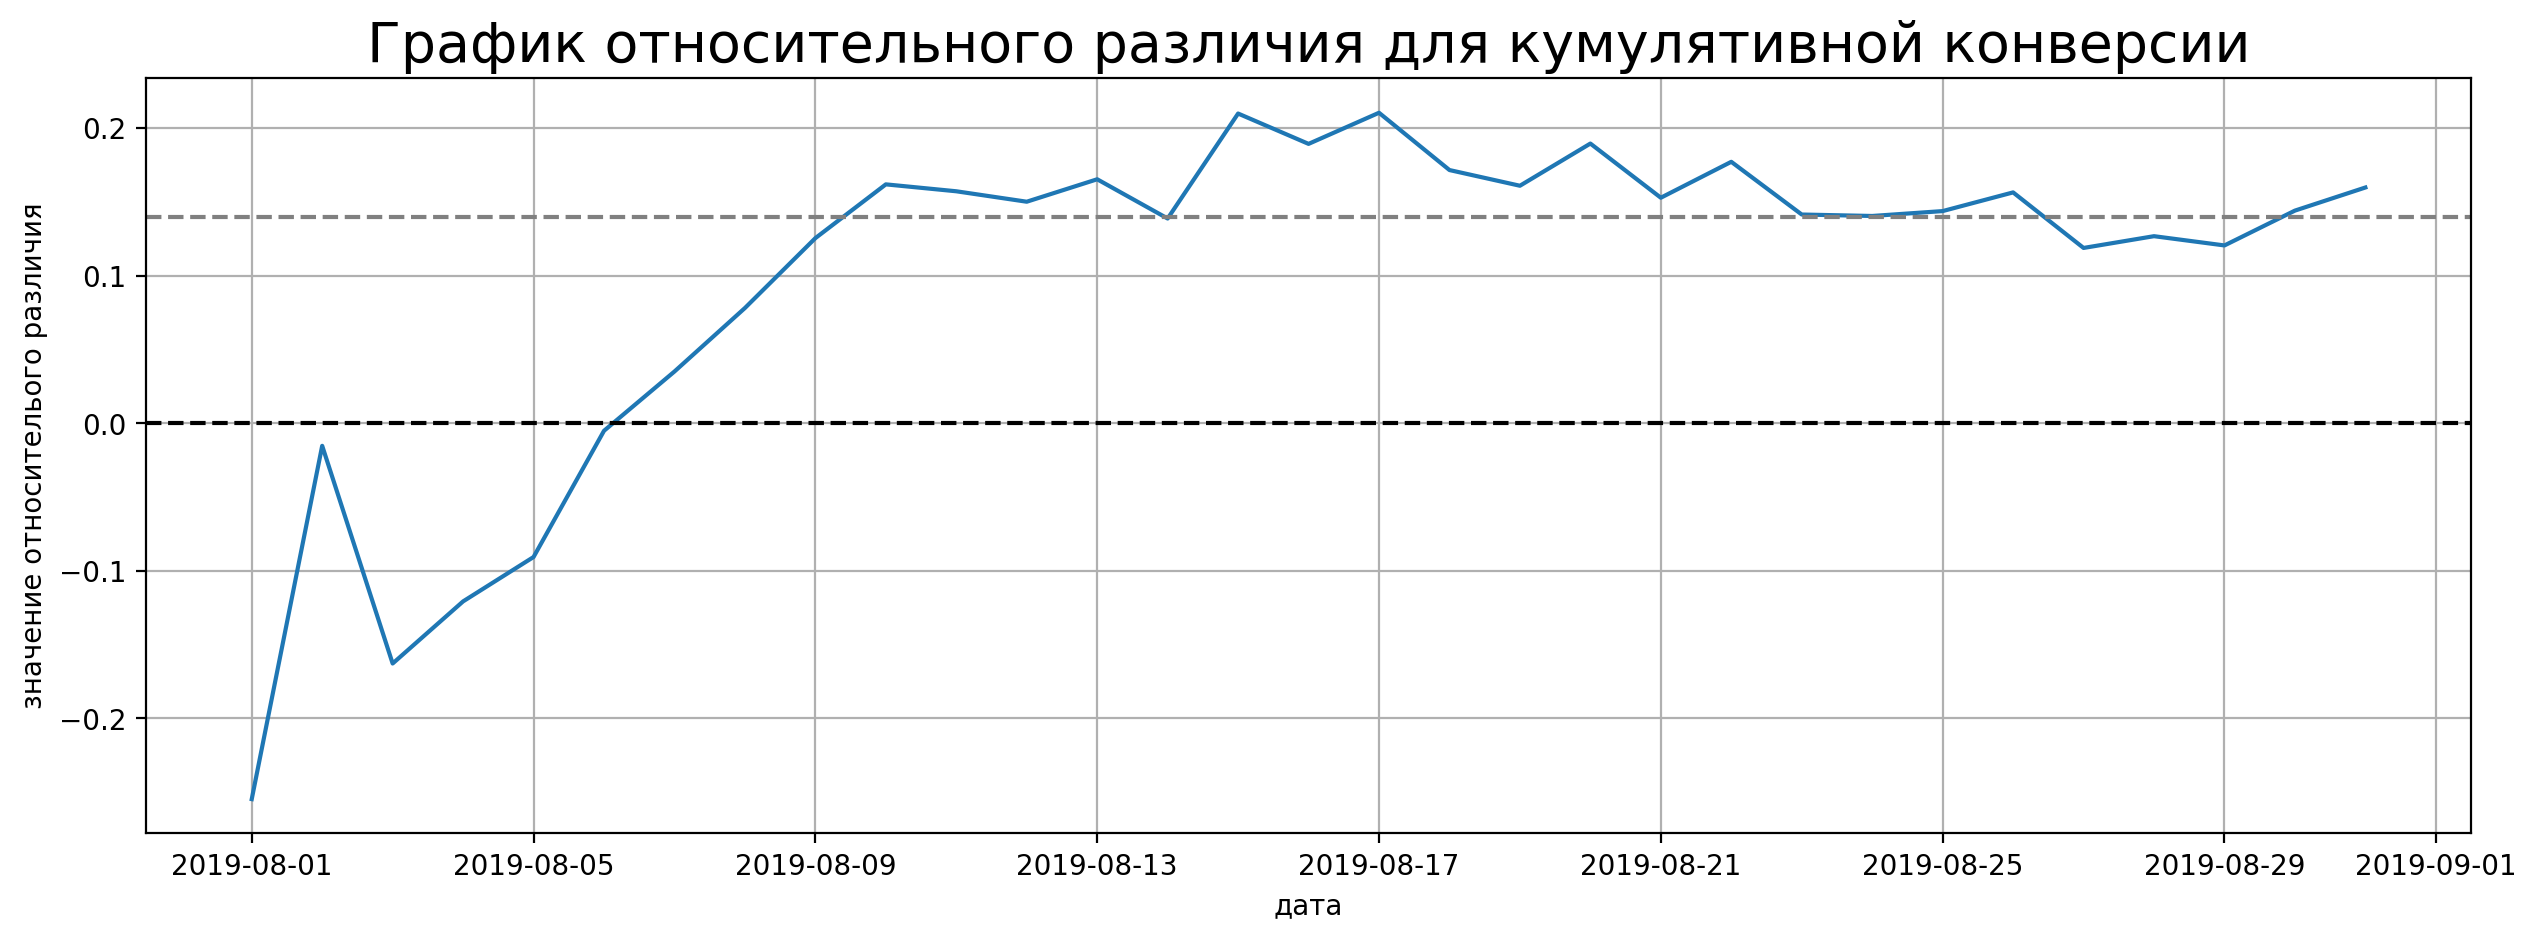

In [21]:
# Вызов функции "plot" для построения графика относительного различия для 
# кумулятивной конверсии:
plot(data,
     (data['ordersCummulativeB']/data['visitorsCummulativeB'])/
     (data['ordersCummulativeA']/data['visitorsCummulativeA']) - 1,
     0.14,
     'График относительного различия для кумулятивной конверсии', False)

#### Вывод:
- Постоенный график подтврждает, что кумулятивная конверсия группы В больше, чем кумулятивная конверстия группы А;
- Значение относительного различия устанавливается на отметке примерно - 0.14.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.9"><a>2.9. Точечный график количества заказов по пользователям

In [22]:
# Расчет количества заказов по пользователям:
ordersByUsers = (orders
                 .drop(['date', 'group', 'revenue'], axis=1)
                 .groupby('visitorId', as_index=False)
                 .agg({'transactionId': 'nunique'})
                )
ordersByUsers.columns = ['visitorId', 'orders']
display(ordersByUsers.head())

,visitorId,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


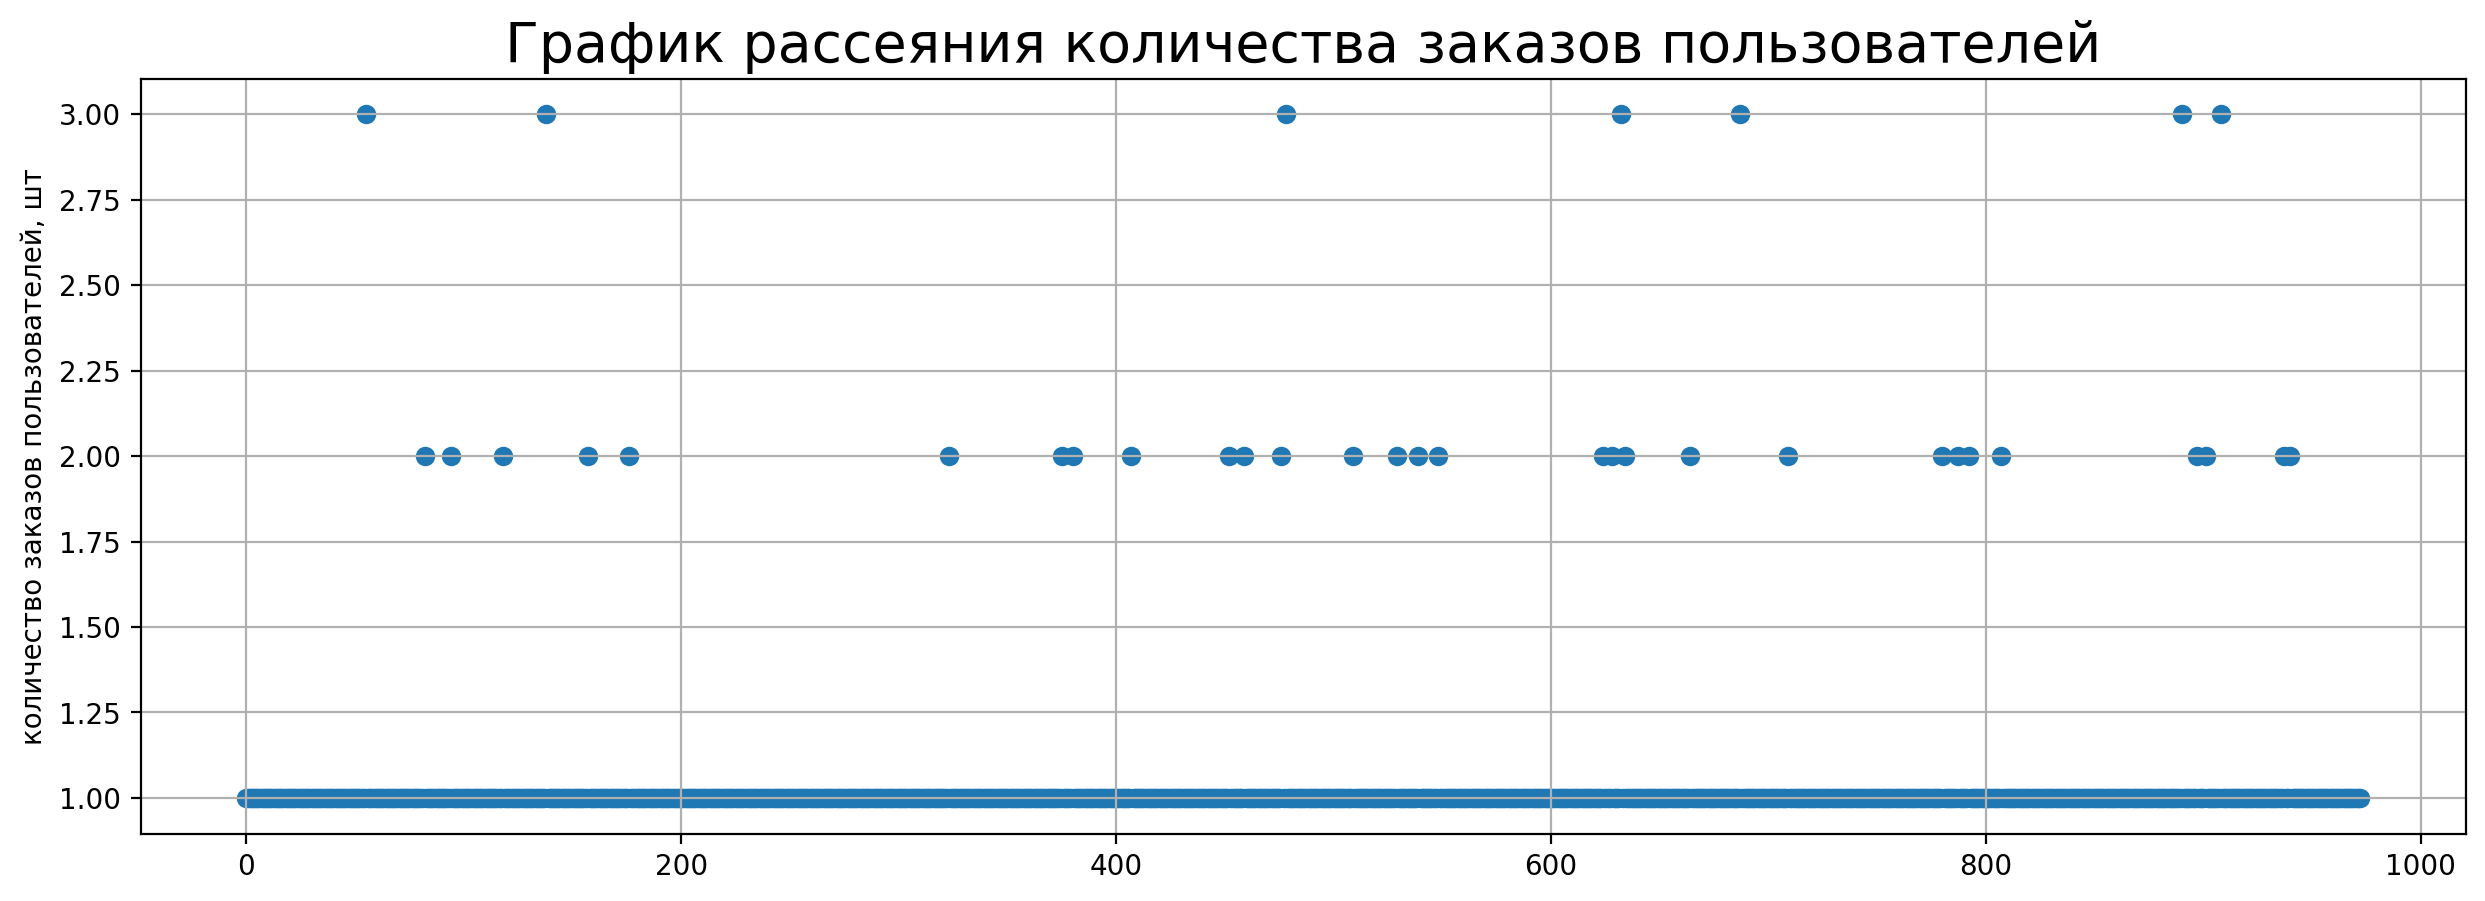

In [23]:
ordersByUsers['x_value'] = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(15, 5), dpi = 200)
plt.title('График рассеяния количества заказов пользователей', fontdict = {'fontsize': 20})

plt.scatter(ordersByUsers['x_value'], ordersByUsers['orders'])
plt.grid()
plt.ylabel('количество заказов пользователей, шт')

plt.show()
plt.close()

#### Вывод:
- По диаграмме рассеяния количества заказов можно сказать, что большинство пользователей совершают всего один заказ, небольшая часть - два заказа, и очень малая часть три более заказов;
- Таким образом, большое количество заказов, сделанное оджним пользователем является скорее исключением, поэтому необходимо выявить данных пользователей и "очистить" от них выборки, для устранения их влияния на результаты проведенного теста.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.10"><a>2.10. Расчет 95-го и 99-го перцентилей количества заказов на пользователя

In [24]:
# Расчет 95 и 99 перцентилей для количества заказов пользователей:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

#### Вывод:
- Согласно полученным значениям всего 5% пользователей совершают более одного и всего 1% - более 2, поэтому логично в качестве границы при "очистке" выборок выбрать пороговое значение количества заказов равное 2 - таким образом, из выборок удалится около 1% заказов, что допустимо.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.11"><a>2.11. Точечный график стоимостей заказов

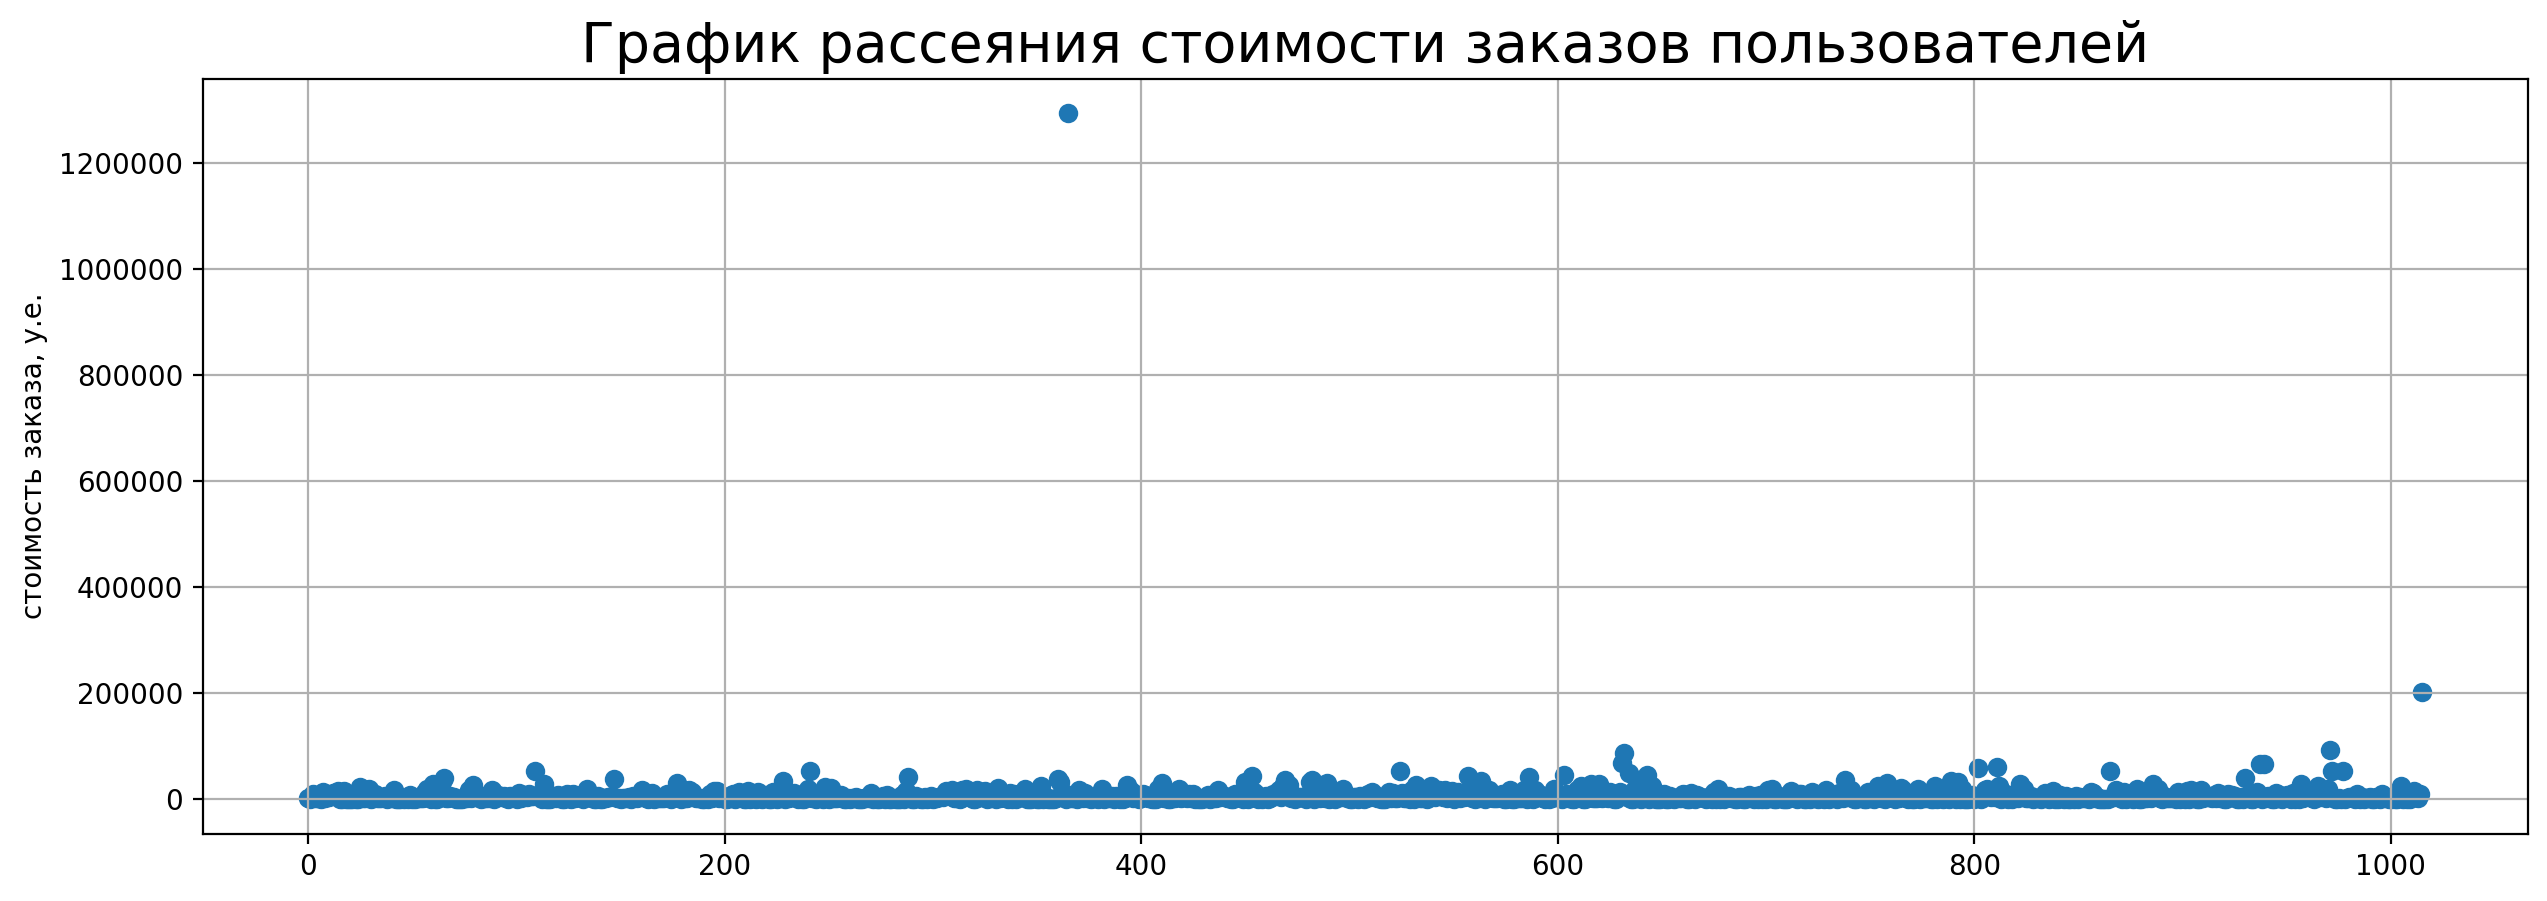

In [25]:
x_value = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 5), dpi = 200)
plt.title('График рассеяния стоимости заказов пользователей', fontdict = {'fontsize': 20})

plt.scatter(x_value, orders['revenue'])
plt.grid()
plt.ylabel('стоимость заказа, у.е.')

plt.show()
plt.close()

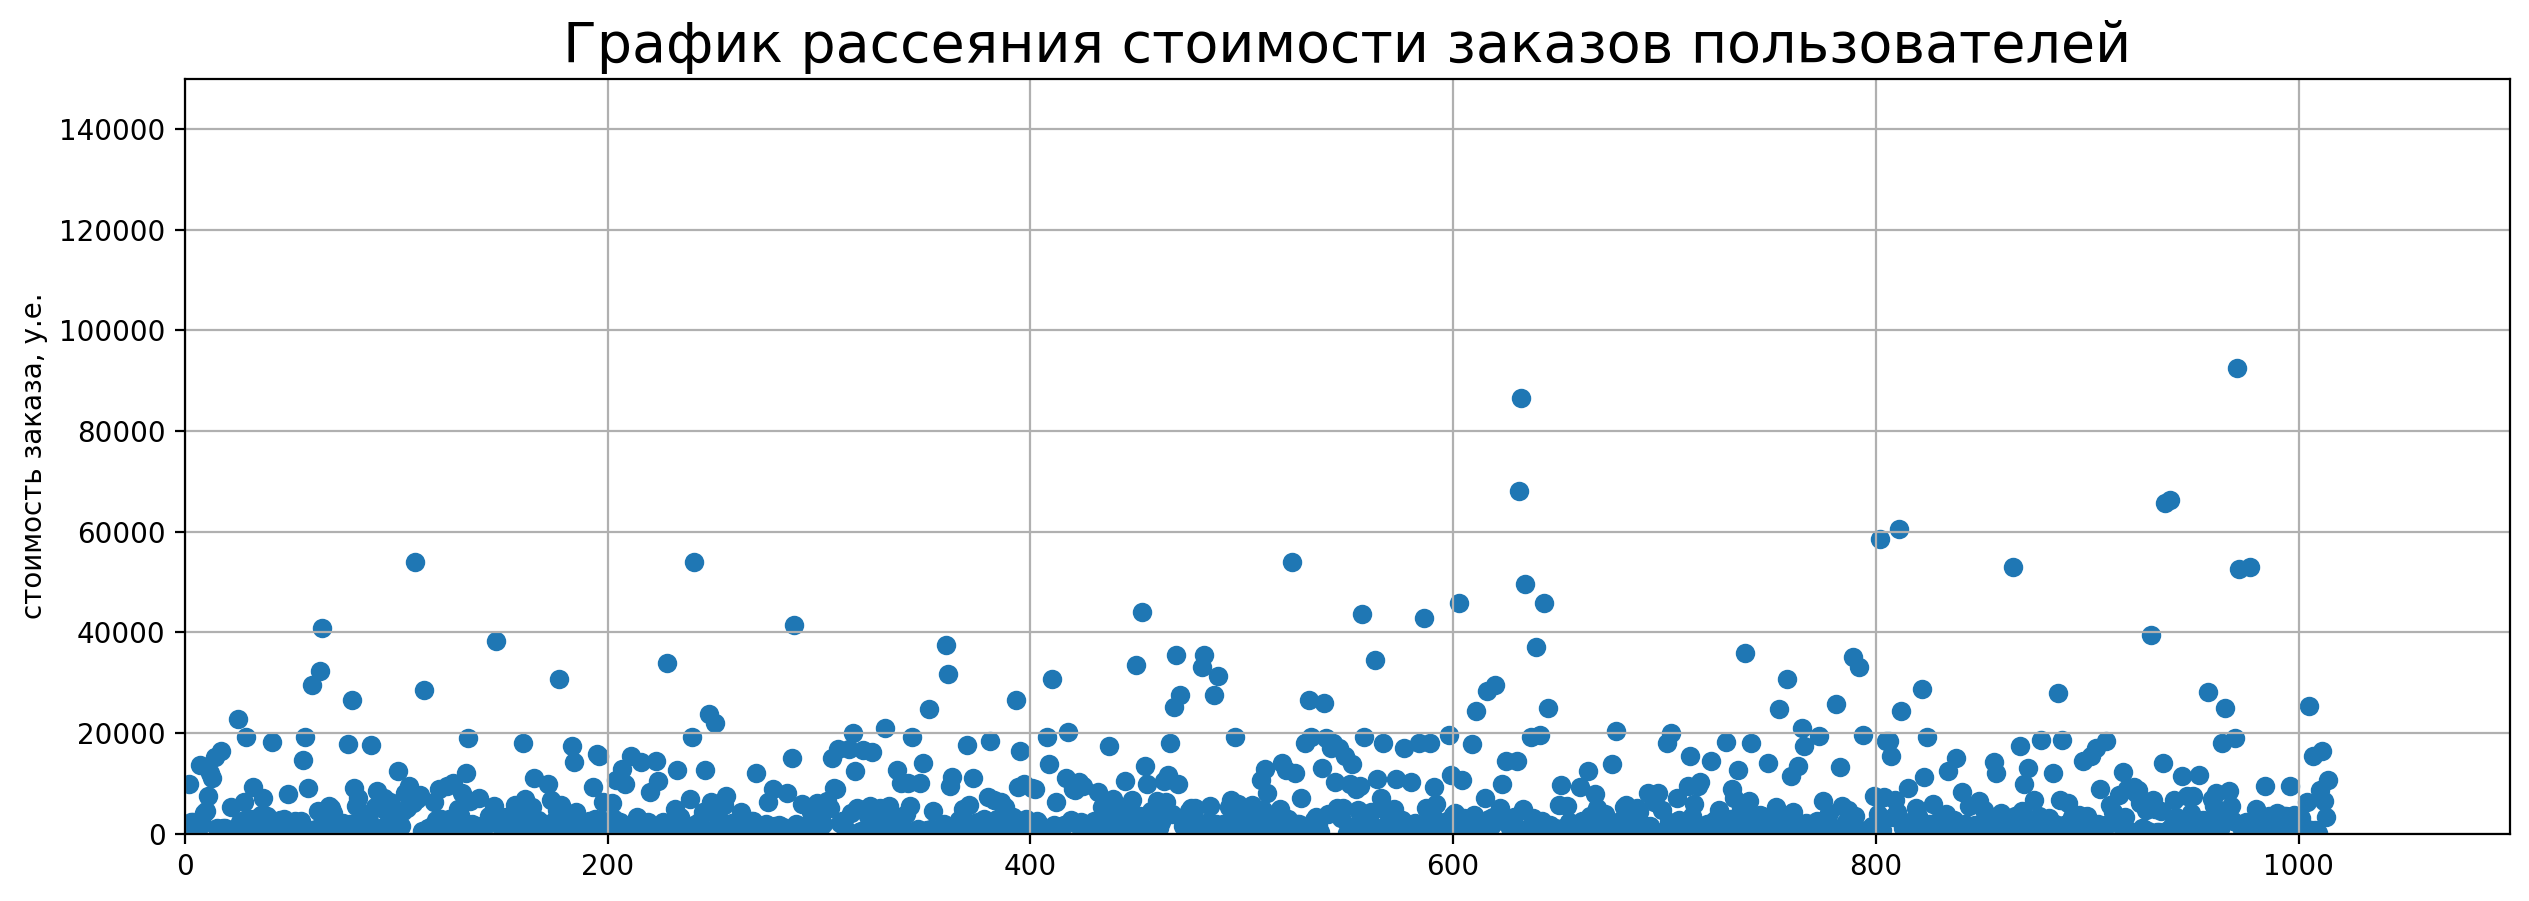

In [26]:
x_value = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(15, 5), dpi = 200)
plt.title('График рассеяния стоимости заказов пользователей', fontdict = {'fontsize': 20})

plt.scatter(x_value, orders['revenue'])
plt.grid()
plt.axis([0, 1100, 0, 150000])
plt.ylabel('стоимость заказа, у.е.')

plt.show()
plt.close()

#### Вывод:
- Скорее всего, единственный заказ стоимостью более 1.2 млн и есть причина резкого скачка в значениях кумулятивной выручки и кумулятивного среднего чека группы В;
- По первому точечному графику вызуально сложно отпределить более точную границу максимальной стоимости заказа, совеошенного большинством пользователей - практически все значения сливаются в одну линию;
- На втором графике (с ограничениями по оси Y) картина становится более четкой - явно видно, что большинство пользователей совершают заказы на сумму менее 20 тыс, однако есть значительная часть, лежащая в диапазоне от 20 до 40 тыс;
- На следующем этапе определим верхние границы суммы заказа 95% и 99% покупателей и по этим значениям определим пороговое значения для "очистки" выборок.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.12"><a>2.12. Расчет 95-го и 99-го перцентилей стоимости заказов

In [27]:
# Расчет 95 и 99 перцентилей для стоимости заказов пользователей:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

#### Вывод:
- Всего 5% покупателей совершают заказы дороже 26.795 тыс, логично в качестве граныци выбрать значение 30 тыс - таким образом, из выборок удалится менее 5% заказов, что допустимо.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.13"><a>2.13. Расчет статистической значимости различий в конверсии между группами по «сырым» данным

Формулируем нулевую и альтернативную гипотезу  
1. **Нулевая гипотеза:** нет статистически значимого различия в конверсии между группами. Конверсия группы В равна конверсии группы А
2. **Альтернативная гипотеза:** есть статистически значимое различие в конверсии между группами. Конверсия группы В не равна конверсии группы А  

In [28]:
# Уникальные "Id" пользователей группы А с количеством совершенных заказов:
ordersByUsersA = (orders[orders['group']=='A']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique})
                 )
ordersByUsersA.columns = ['visitorId', 'orders']

# Уникальные "Id" пользователей группы В с количеством совершенных заказов:
ordersByUsersB = (orders[orders['group']=='B']
                  .groupby('visitorId', as_index=False)
                  .agg({'transactionId' : pd.Series.nunique})
                 )
ordersByUsersB.columns = ['visitorId', 'orders'] 

# Подготовка выборок для расчета статистической значимости различия конверсий состоящих из:
# - списка с количеством заказов для каждого пользователя;
# - нули для пользователей, которые ничего не заказали.
# Выборка для пользователей группы А:
sampleA = pd.concat([ordersByUsersA['orders'], 
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()
                                                  - len(ordersByUsersA['orders'])),
                               name='orders')],axis=0)
# Выборка для пользователей группы В:
sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()
                                                  - len(ordersByUsersB['orders'])),
                               name='orders')],axis=0)

In [29]:
# Функция для определения значения статистической значимости различий,
# вывода по наличию статистического различия между выборками и 
# расчета значения относительного различия в значении:
def stat_difference(sampleA, sampleB, alpha):
    # Значение статистической значимости различий U-критерием Манна-Уитни:
    p_value = st.mannwhitneyu(sampleA, sampleB, True, 'two-sided')[1]
    print("Значение статистической значимости различий: {0:.3f}"
      .format(p_value))
    # Сравнение полученного значения с уровнем статистической значимости:
    if p_value < alpha:
        print ('Есть статистически значимое различие между значениями')
    else:
        print ('Нет статистически значимого различия между значениями')
    
    # Относительное различие в значении конверсии:
    print("Относительное различие в значении: {0:.2%}"
          .format(sampleB.mean()/sampleA.mean()-1)) 

In [30]:
stat_difference(sampleA, sampleB, 0.05)

Значение статистической значимости различий: 0.011
Есть статистически значимое различие между значениями
Относительное различие в значении: 15.98%


#### Вывод:
- После проведения непараметрического теста Уилкоксона-Манна-Уитни получили значение статистической значимости различий равное 0.011 (1.1%);
- Согласно данному значению есть статистически значимое различие  между значениями конверсий;
- Относительное различие в значении 15.98%.
- Получаем, что значение конверсии группы В больше, чем для группы А.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.14"><a>2.14. Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Формулируем нулевую и альтернативную гипотезу  
1. **Нулевая гипотеза:** нет статистически значимого различия в среднем чеке между группами. Средний чек группы В равен среднему чеку группы А
2. **Альтернативная гипотеза:** есть статистически значимое различие в среднем чеке между группами. Средний чек группы В не равен ксреднему чеку группы А  

In [31]:
stat_difference(orders[orders['group']=='A']['revenue'],
                orders[orders['group']=='B']['revenue'], 0.05)

Значение статистической значимости различий: 0.829
Нет статистически значимого различия между значениями
Относительное различие в значении: 28.66%


#### Вывод:
- После проведения непараметрического теста Уилкоксона-Манна-Уитни получили значение статистической значимости различий равное 0.829 (82.9%);
- P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Хотя, средний чек группы B значительно выше среднего чека группы A;
- Относительное различие в значении среднего чека 28.66%.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.15"><a>2.15. Расчет статистической значимости различий в конверсии между группами по «очищенным» данным

Повторяем проверку следующих гипотез, но для "очищенных" данных:  
1. **Нулевая гипотеза:** нет статистически значимого различия в конверсии между группами. Конверсия группы В равна конверсии группы А
2. **Альтернативная гипотеза:** есть статистически значимое различие в конверсии между группами. Конверсия группы В не равна конверсии группы А  

In [32]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
                                 ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']],
                                axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders],
                          axis = 0).drop_duplicates().sort_values()
print('Количество пользователей с большим числом заказов и дорогими заказами:',
      abnormalUsers.shape[0])
print('Доля этих пользователей от общего числа покупателей: {:.2%}'
      .format(abnormalUsers.shape[0]/ordersByUsers.shape[0]) )

Количество пользователей с большим числом заказов и дорогими заказами: 49
Доля этих пользователей от общего числа покупателей: 5.04%


In [33]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum()
                                                          - len(ordersByUsersA['orders'])),
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId']
                                                           .isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum()
                                                          - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0) 

In [34]:
stat_difference(sampleAFiltered,
                sampleBFiltered, 0.05)

Значение статистической значимости различий: 0.010
Есть статистически значимое различие между значениями
Относительное различие в значении: 18.73%


#### Вывод:
- После проведения непараметрического теста Уилкоксона-Манна-Уитни получили значение статистической значимости различий равное 0.010 (1.0%);
- Согласно данному значению есть статистически значимое различие  между значениями конверсий;
- Относительное различие в значении увеличилось - 18.73%.
- Выводы по наличию статистически значимого различия для конверсии двух групп не изменились: получаем, что значение конверсии группы В больше, чем для группы А.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.16"><a>2.16. Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Повторяем проверку следующих гипотез, но для "очищенных" данных: 
1. **Нулевая гипотеза:** нет статистически значимого различия в среднем чеке между группами. Средний чек группы В равен среднему чеку группы А
2. **Альтернативная гипотеза:** есть статистически значимое различие в среднем чеке между группами. Средний чек группы В не равен ксреднему чеку группы А  

In [35]:
stat_difference(orders[np.logical_and(orders['group']=='A',
                                      np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                ['revenue'],
                orders[np.logical_and(orders['group']=='B',
                                      np.logical_not(orders['visitorId'].isin(abnormalUsers)))]
                ['revenue'], 0.05)

Значение статистической значимости различий: 0.741
Нет статистически значимого различия между значениями
Относительное различие в значении: -2.66%


#### Вывод:
- После проведения непараметрического теста Уилкоксона-Манна-Уитни получили значение статистической значимости различий равное 0.741 (74.1%);
- P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет;
- Относительное различие в значении среднего чека -2.66%;
- Относительное различие в значении среднего чека не только значительно меньше для "очищенных" данных, чем для исходных, но имеет другой знак - значение среднего чека для группы В стало меньше, чем значение для группы А. На данном примере хорошо видно, как аномальные значения (дорогие заказы и большое количество заказов на одного пользователя) могут повлиять на результаты и выводы из А/В-теста.

**<a href='#content'>К содержанию...</a>**

### <a id="step2.17"><a>2.17. Графики по «очищенным» данным

In [36]:
# Вызов функции "data_preparation()" для создания таблицы по "очищенным" данным:
dataFiltered = data_preparation(visitors,
                                orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))])
# Вывод первых 5 строк результирующей таблицы "dataFiltered":
display(dataFiltered.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,18,112340,17,59758,18,112340,17,59758,719,713,719,713
1,2019-08-02,18,89912,21,93234,36,202252,38,152992,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,60,314725,52,220041,507,509,1845,1803
3,2019-08-04,11,41176,13,65540,71,355901,65,285581,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,93,442284,86,375489,756,707,3318,3280


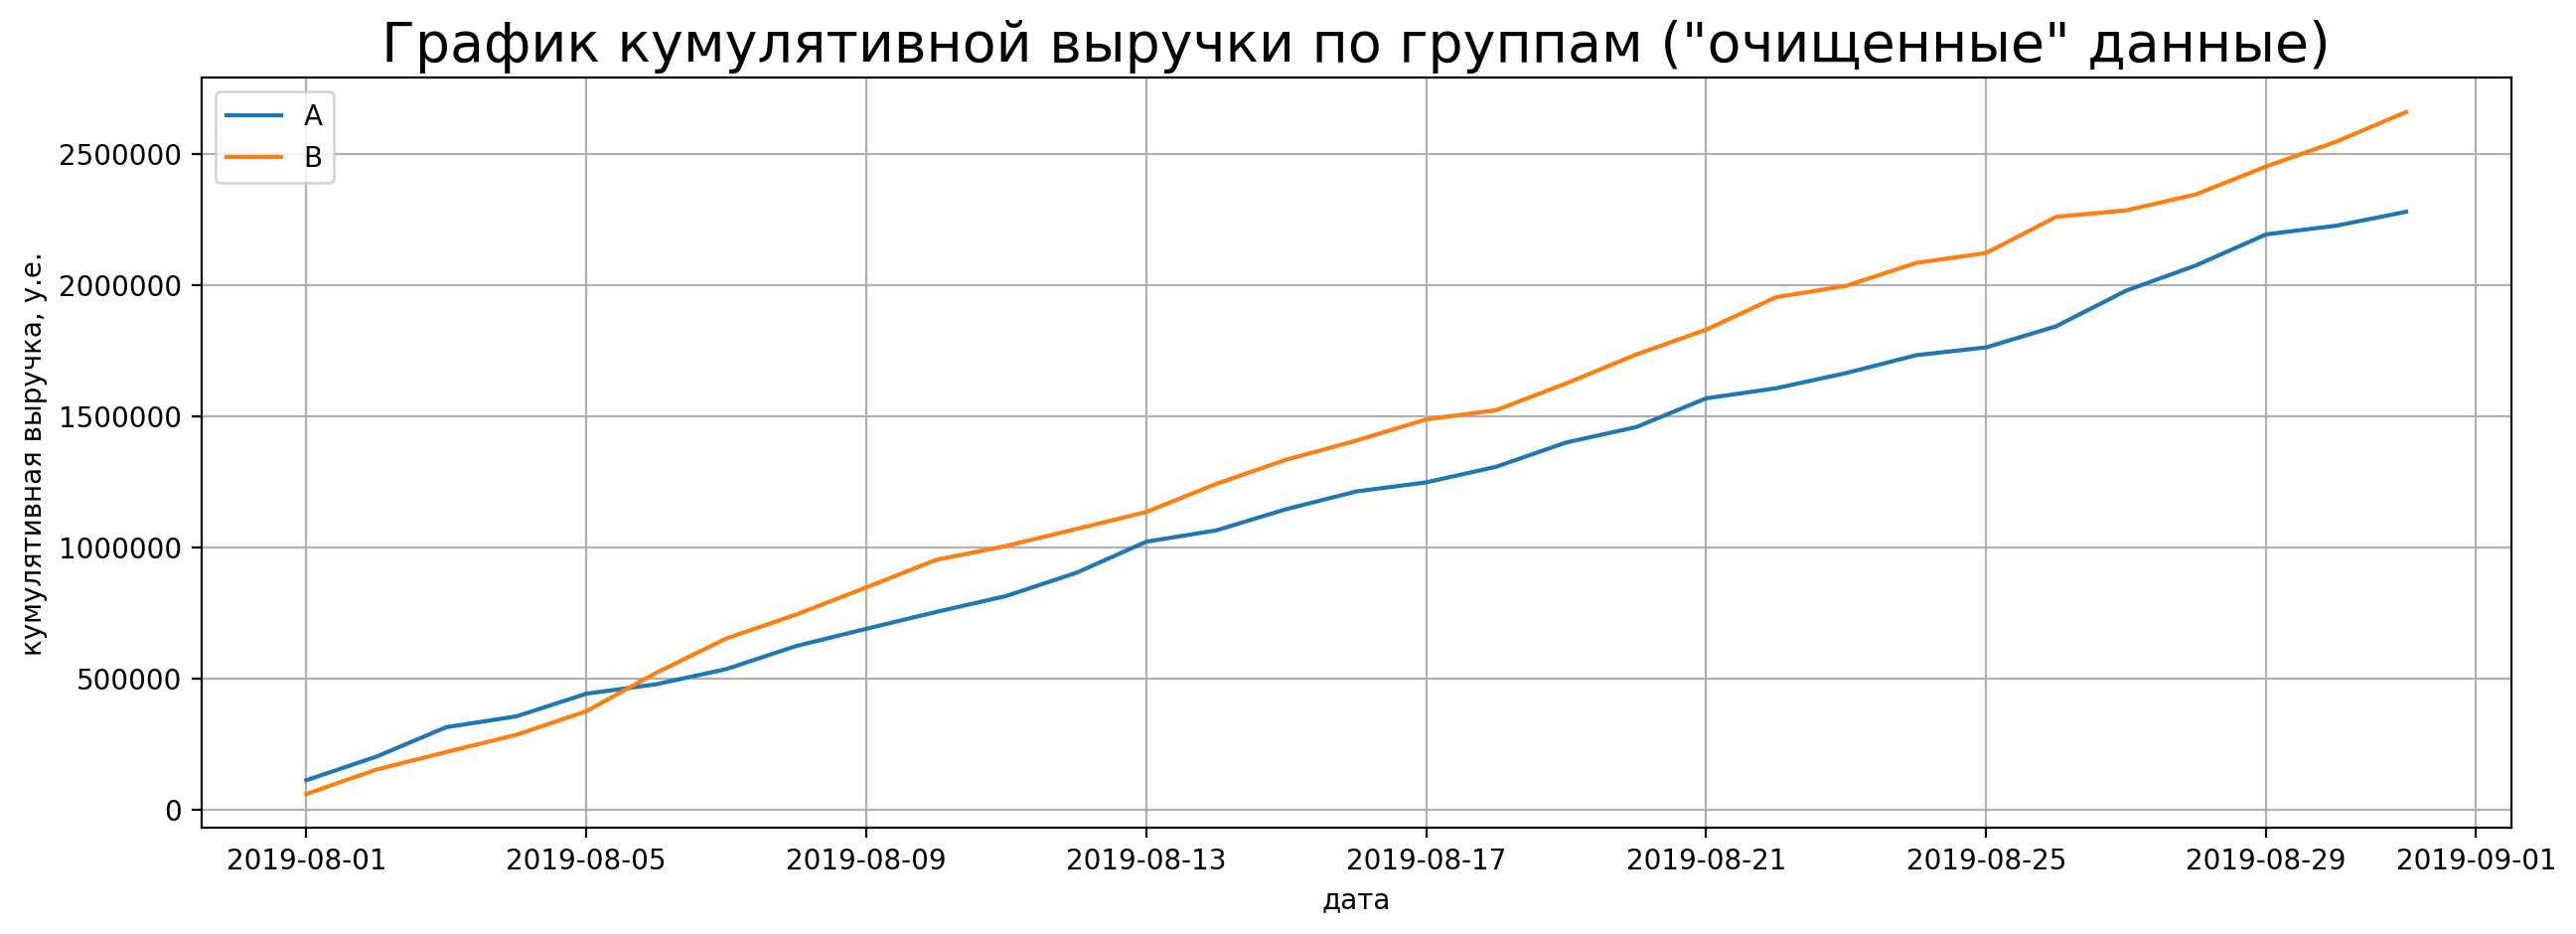

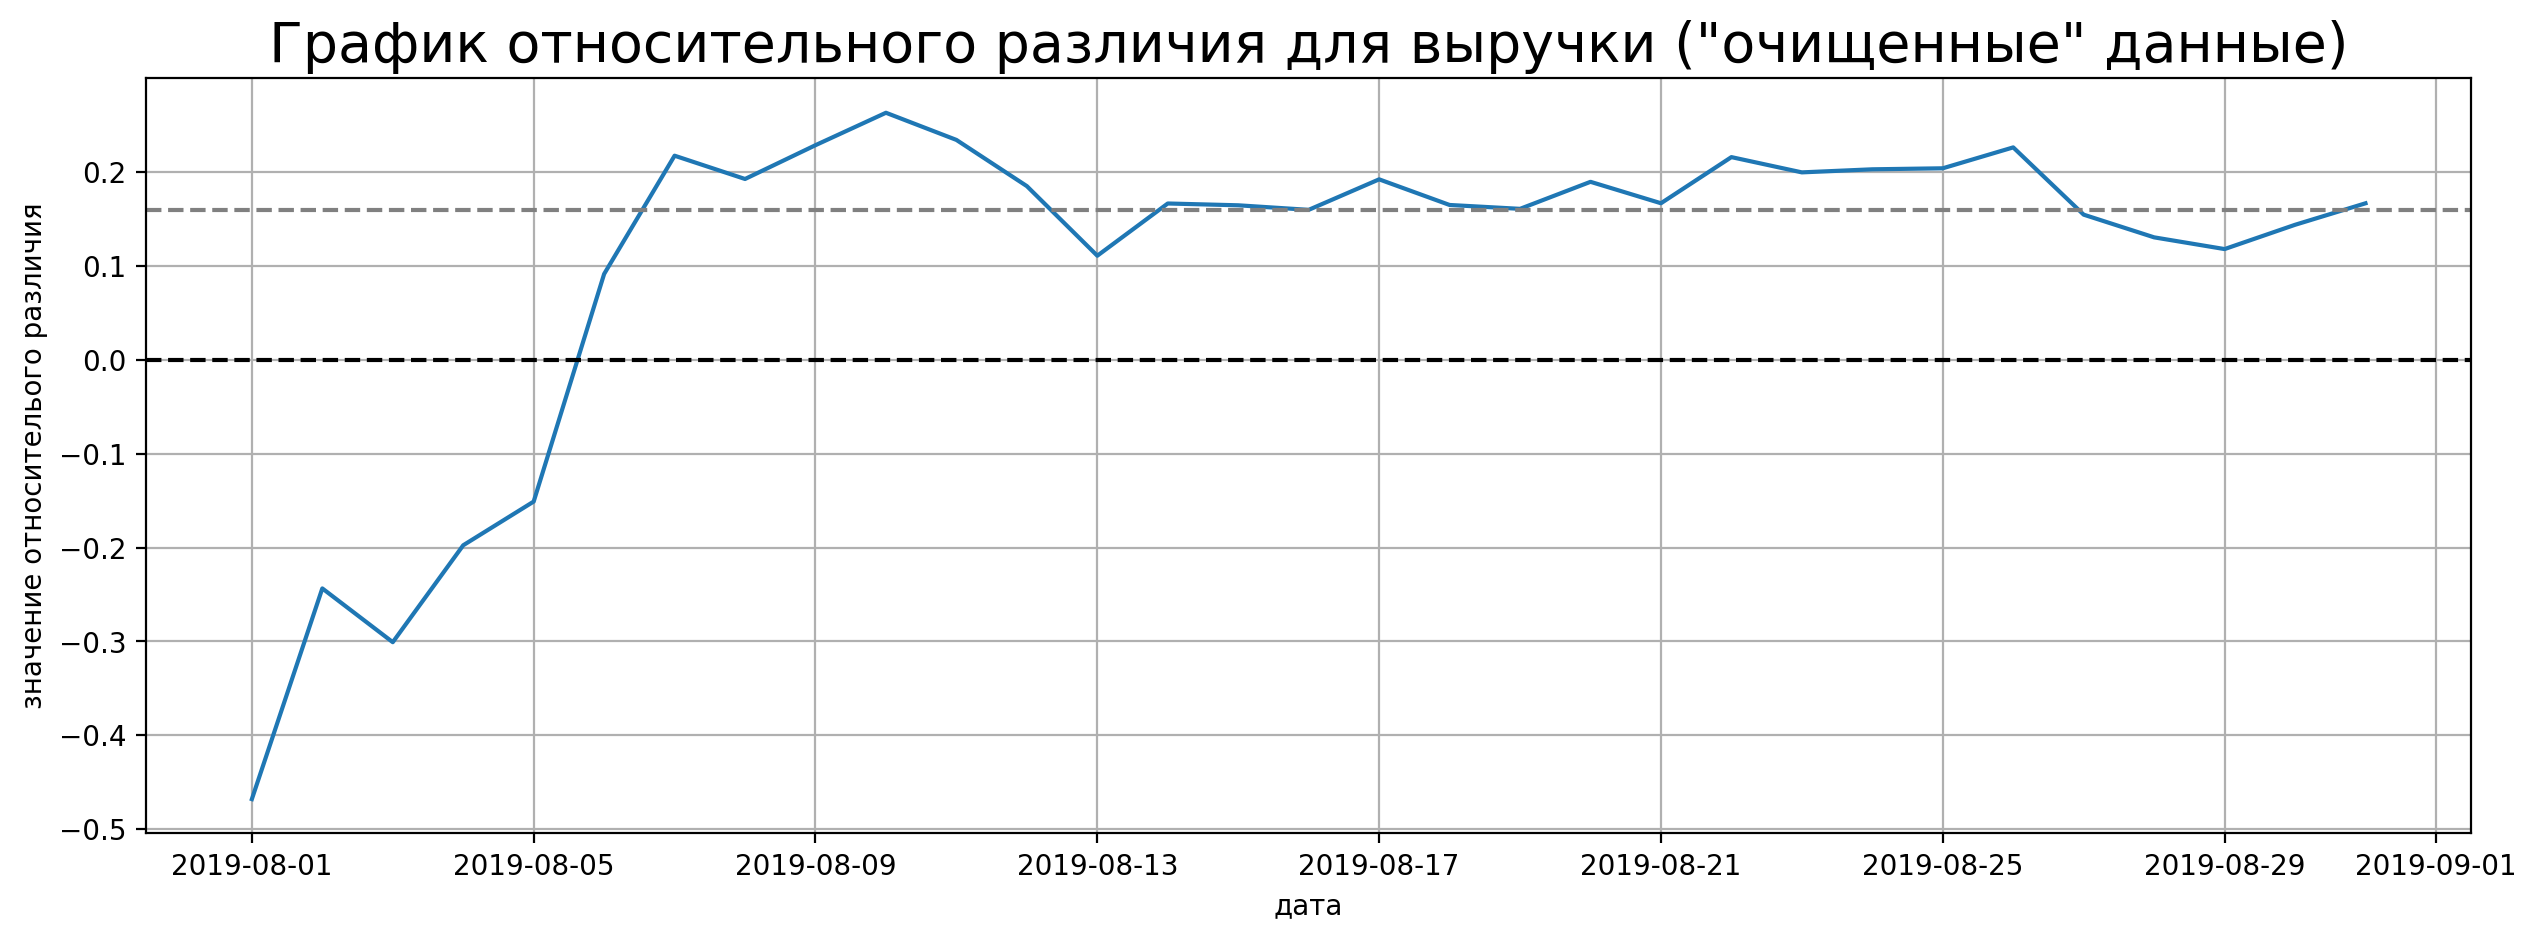

In [37]:
# Вызов функции "joint_plot()" для построения графика кумулятивной выручки по группам
joint_plot(dataFiltered, 
           dataFiltered['revenueCummulativeA'], 
           dataFiltered['revenueCummulativeB'],
           'График кумулятивной выручки по группам ("очищенные" данные)',
           'кумулятивная выручка, у.е.', False)

# Вызов функции "plot" для построения графика относительного различия для выручки:
plot(dataFiltered,
     dataFiltered['revenueCummulativeB']/dataFiltered['revenueCummulativeA'] - 1,
     0.16,
     'График относительного различия для выручки ("очищенные" данные)', False)

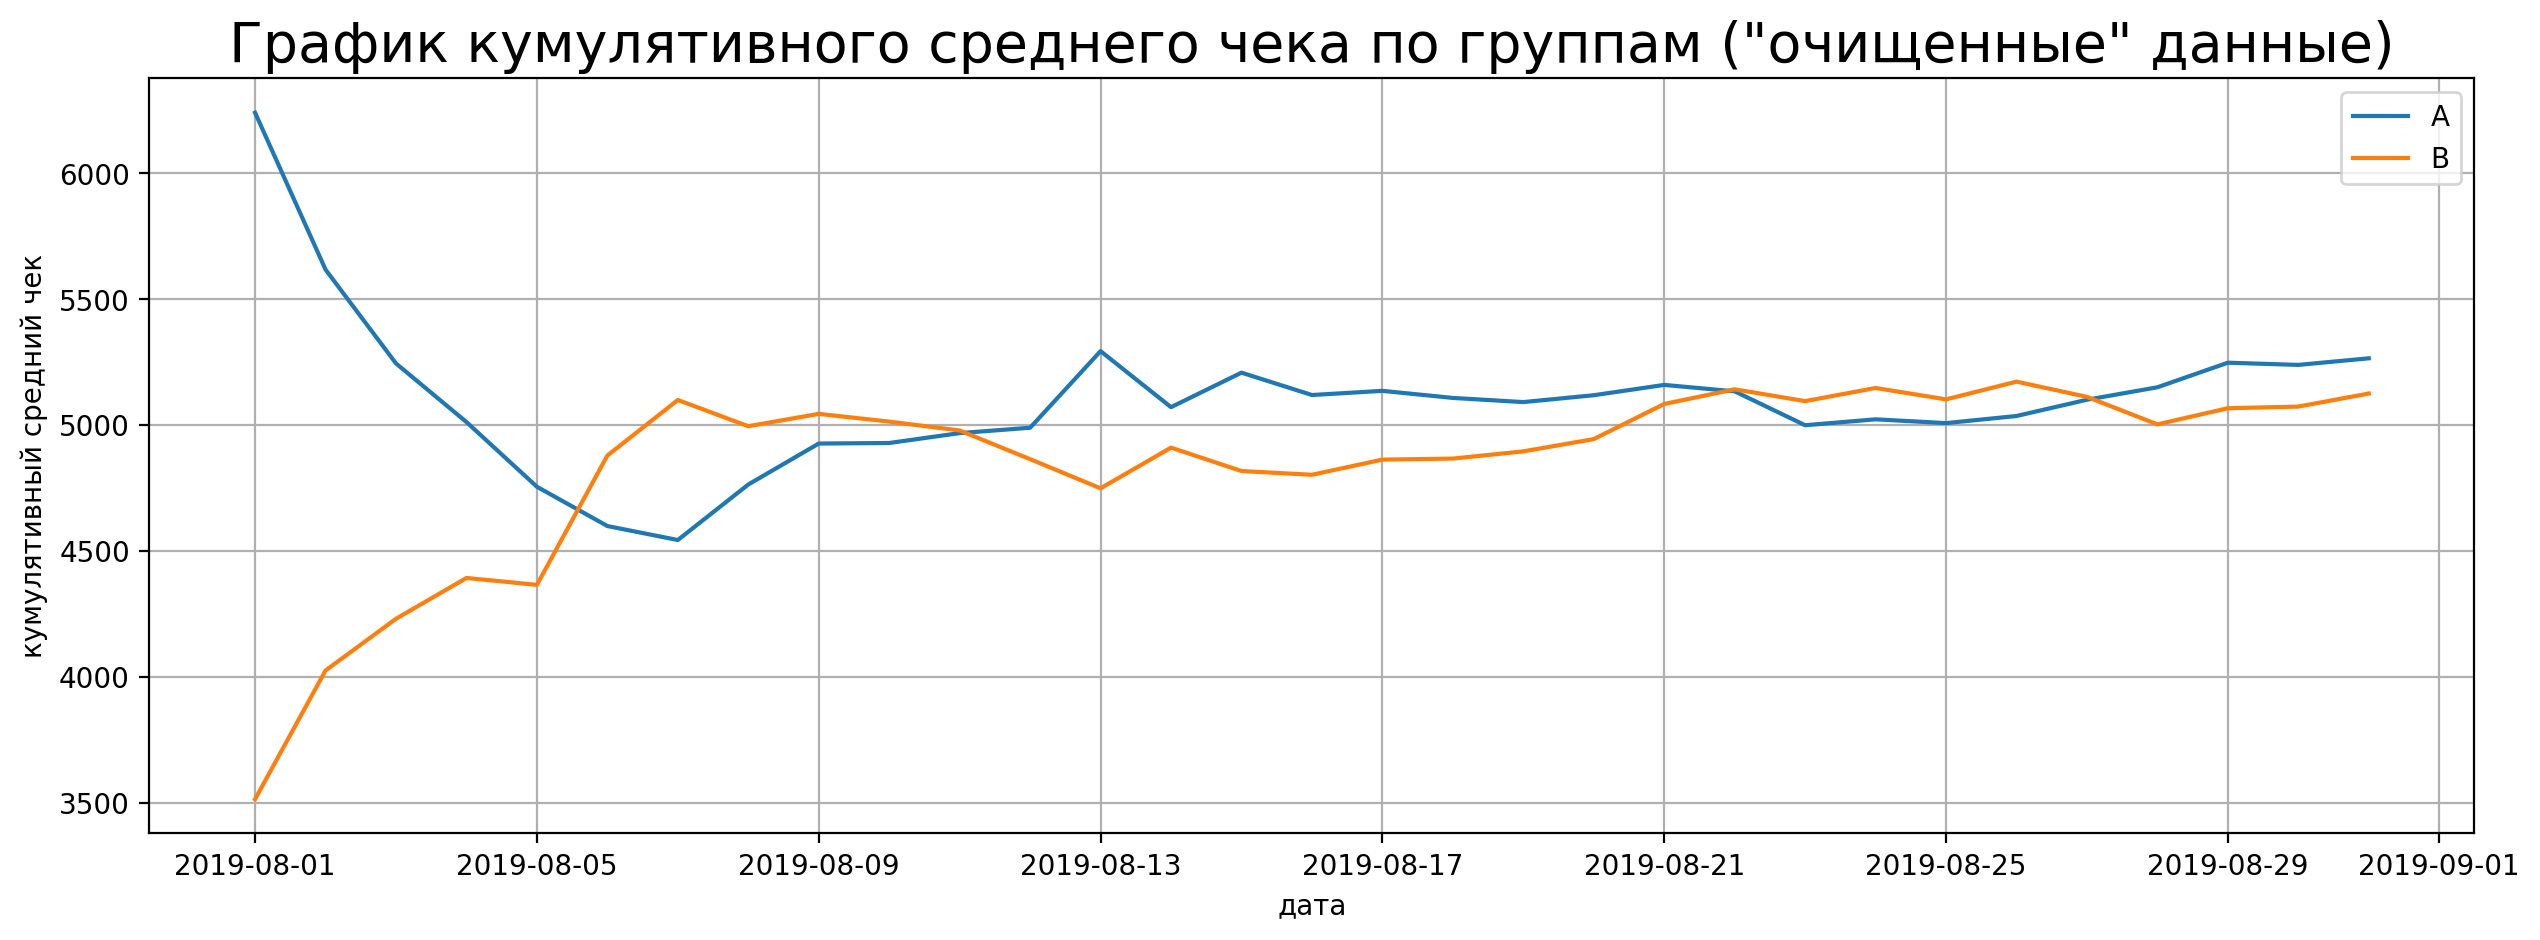

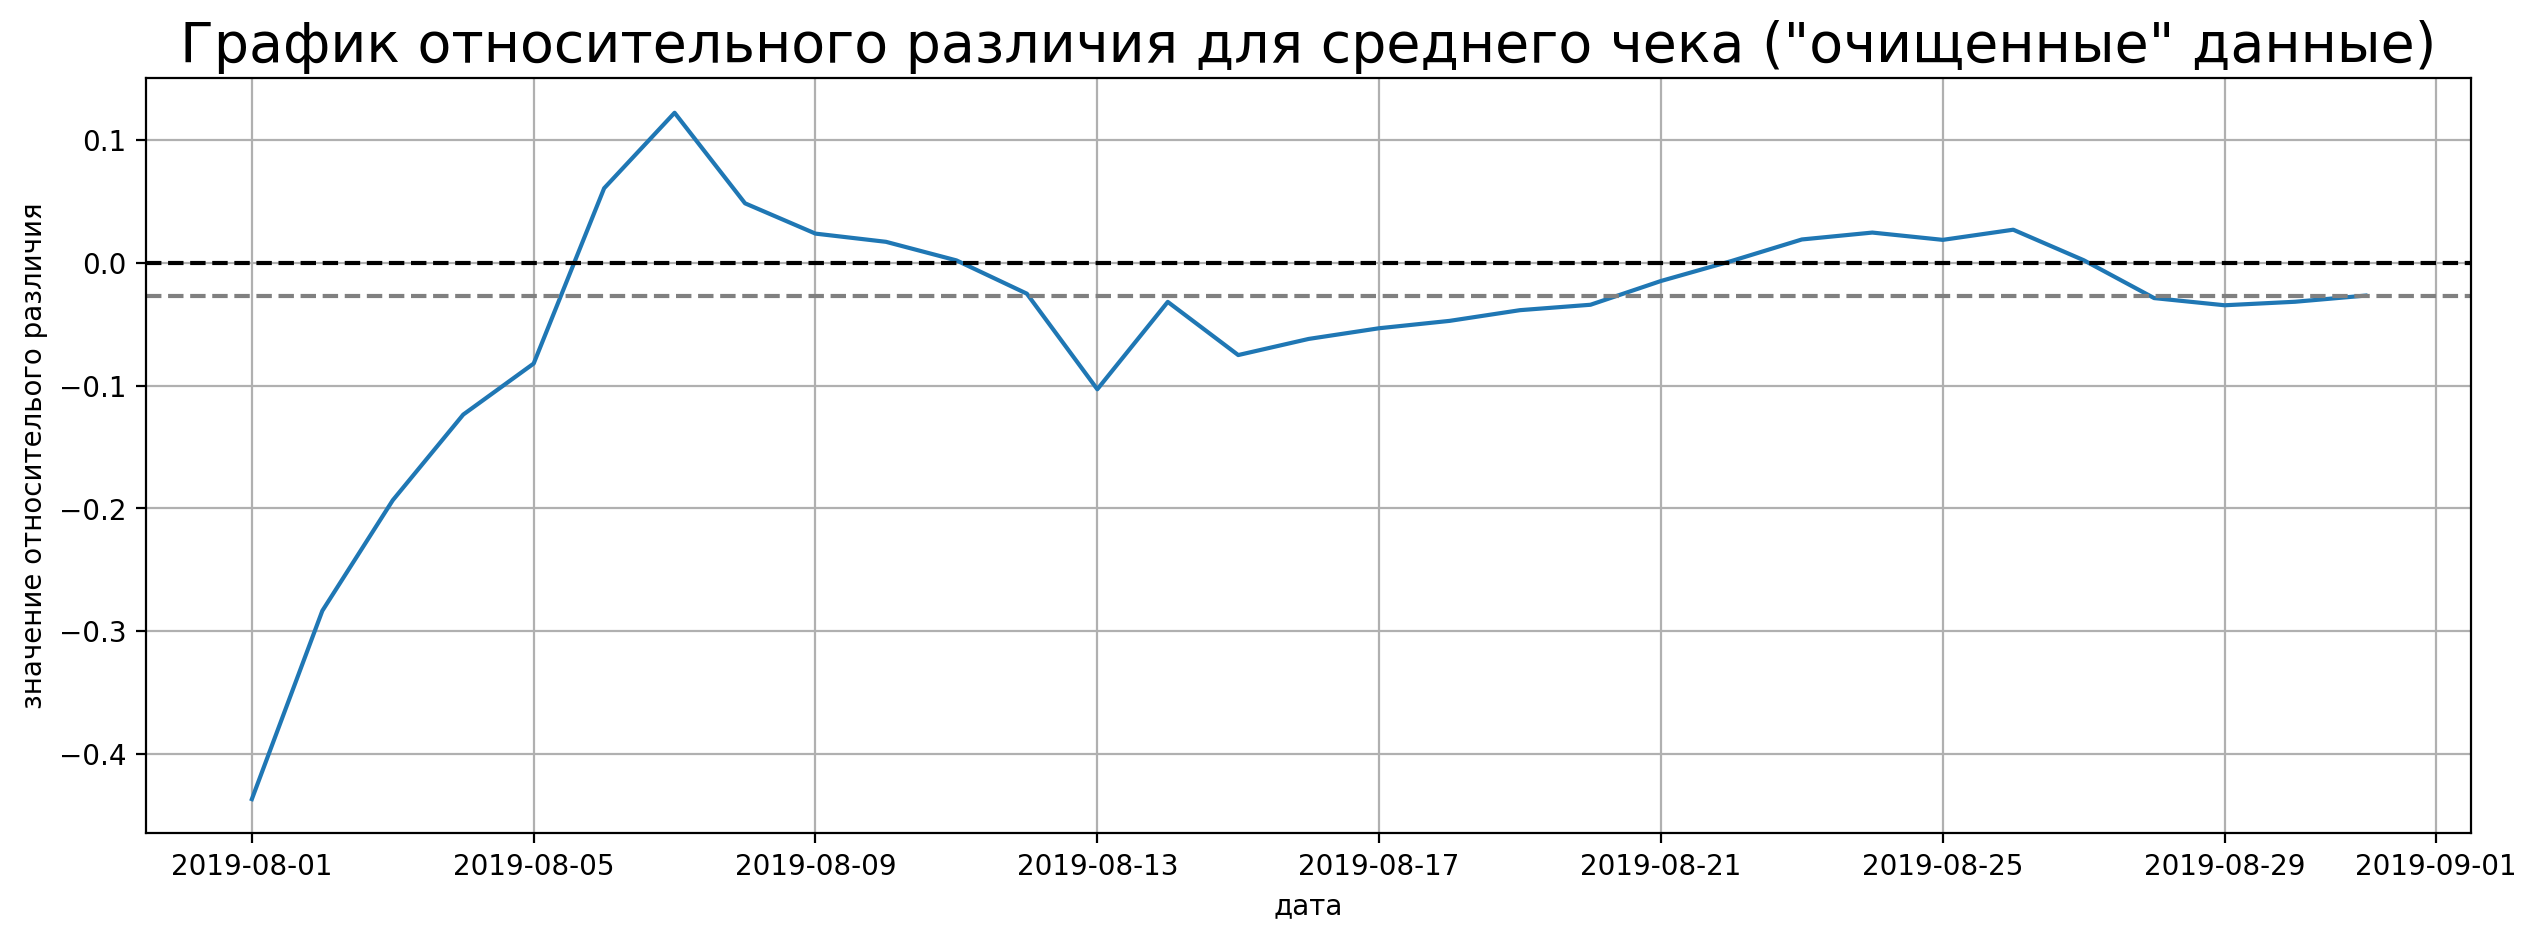

In [38]:
# Вызов функции "joint_plot()" для построения графика кумулятивного среднего чека по группам:
joint_plot(dataFiltered,
           dataFiltered['revenueCummulativeA']/dataFiltered['ordersCummulativeA'],
           dataFiltered['revenueCummulativeB']/dataFiltered['ordersCummulativeB'],
           'График кумулятивного среднего чека по группам ("очищенные" данные)',
          'кумулятивный средний чек', False)

# Вызов функции "plot" для построения графика относительного различия для среднего чека:
plot(dataFiltered,
     (dataFiltered['revenueCummulativeB']/dataFiltered['ordersCummulativeB'])/
     (dataFiltered['revenueCummulativeA']/dataFiltered['ordersCummulativeA']) - 1,
     -0.027,
     'График относительного различия для среднего чека ("очищенные" данные)', False)

#### Вывод:
- По графику кумулятивной выручки для групп А и В, по строенному на основе "очищенных" данных можно сказать, что кумулятивная выручка группы В стабильно больше кумулятивной выручки группы В на протяжении практически всего периода;
- График относительного различия для кумулятивной выручки это подтверждает, причем, можно заметить, что значение относительного различия после значительного колебания в начале периода установилось на определенном значении (по графику - примерно 0.15) и продолжает немного колебаться около этого значения;
- График кумулятивного среднего чека для групп А и В практически симметричен. В начале периода заметны сильные колебания, графики выравниваются и, можно сказать, устанавливаются на второй половине периода;
- Это подтверждает и график относительного различия среднего чека группы В к группе А.

**<a href='#content'>К содержанию...</a>**

## <a id="step3"><a>Общий вывод

По проведенной приритизации гипотез имеем:
- Таким образом, основным различием в данных оценках выступает охват пользователей;
- Его значение смещает позицию, полученную фреймворком "ICE" в большую или меньшую сторону;

По результатам проведенных расчетов и построенных графиков на основе исходных и "очищенных" данных имеем следующее:
- Между группами А и В есть статистически значимое различие по конверсии по «сырым» и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий, не смотря на то, что значение относительного различия значений группы В к группе А достаточно большое - 28.66%. Это значение в большей степени обусловлено наличием анамалиями в выбоках;
- Графики различия конверсии между группами (по исходным и по "очищенным" данным) сообщают, что результаты группы B лучше группы A. Значения установились на определенном уровне, что подтверждает график относительного различия.
- Что касается графиков для кумулятивного среднего чека - они достаточно сильно различаются. Если оценивать графики по исходным данным, нельзя с точностью сказать, что значения установилось. Тогда как, по графикам, построенным по "очищенным" данным видно, что относительное различие для среднего чека, хоть и продолжает колебаться все же делает это относитально 0. Тенденции к значительным изменениям не наблюдается.
- По всем выше перечисленным фактам можно принять решение об остановке теста и зафиксировать "победу" группы В:
    - По среднему чеку статистически значимого различия нет;
    - Однако, есть статистически значимое различие в конверсии: эта метрика по группе В лучше, чем по группе А;
    - Как следствие, кумулятивная вырочка по группе В стабильно выше, чем по группе А (что хорошо показывает график кумулятивной выручки по группам, построенным по "очищенным" данным).